# TELECOM_CHURN_CASE_STUDY

In [1]:
#importing all necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Step 1:Reading data and understanding the data 

In [2]:
# 1.Reading data from csv file

tele = pd.read_csv("telecom_churn_data.csv")

In [3]:
#Reading and understanding data
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
#check the format of the database
tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
#check for null 
round((tele.isnull().sum()/len(tele))*100,2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [6]:
#check for no. of rows nad columns in the dataframe
tele.shape

(99999, 226)

## Step 2:Data Cleaning

In [7]:
#imputing and dealing with missing values
drop_col = list(round(tele.isnull().sum()/len(tele.index)*100,2)[round(100*tele.isnull().sum()/len(tele.index),2)>60].keys())

In [8]:
drop_col

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [9]:
#dropping columns with high percentage of missing values
tele = tele.drop(drop_col,axis =1)

In [10]:
#Checking rows nad columns in the dataframe
tele.shape

(99999, 186)

### Checking and dropping unnecessary columnns 

In [11]:
#check for columns with datatype as object
tele.columns[tele.dtypes.values=='object']

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

#### Since from the dataframe we can see that date of month column are not needed thus dropping them will be better

In [12]:
#dropping unnecessary columns
tele = tele.drop(tele.columns[tele.dtypes.values=='object'],axis = 1)

### Imputing missing values with help of Fancy Imputer 

In [13]:
#importing the library
from fancyimpute import IterativeImputer

Using TensorFlow backend.


In [14]:
tele_col = tele.columns

In [15]:
#instance of interative imputer
ii = IterativeImputer()
tele_c = pd.DataFrame(ii.fit_transform(tele))
tele_c.columns = tele_col

In [16]:
tele_c.to_csv('my_file.csv',index = False)

In [17]:
tele_c = pd.read_csv('my_file.csv')

In [18]:
#check for percentage of missing values
round(100*tele_c.isnull().sum()/len(tele_c.index),2)

mobile_number         0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
                     ... 
last_day_rch_amt_9    0.0
vol_2g_mb_6           0.0
vol_2g_mb_7           0.0
vol_2g_mb_8           0.0
vol_2g_mb_9           0.0
vol_3g_mb_6           0.0
vol_3g_mb_7           0.0
vol_3g_mb_8 

## Step 3: Filter high value customer

In [19]:
#calculate total_rech_amt with help of good phase
tele_c['total_rech_amt'] = (tele_c['total_rech_amt_6'] + tele_c['total_rech_amt_7'])/2
#calculating high value customer with total_rech_amt>70 
tele_c = tele_c[tele_c['total_rech_amt'] > tele_c['total_rech_amt'].quantile(0.70)]

In [20]:
#drop unnecessary coliumns
tele_c.drop('total_rech_amt',axis=1,inplace=True)

In [21]:
#checking rows and columns in the dataframe
tele_c.shape

(29979, 178)

## Step 3: Derive Churn

In [22]:
#deriving the churn variable with help of 9 th months data
tele_c['churn'] = np.where((tele_c['total_og_mou_9'] + tele_c['total_ic_mou_9'] + tele_c['vol_2g_mb_9'] + tele_c['vol_3g_mb_9'])== 0, 1, 0)

In [23]:
#contains columns with 9 th month data
delete = []

In [24]:
#deleting 9 th month data
for i in tele_col:
    if '9' in i:
        delete.append(i)

In [25]:
#dropping 9 th months data from dataframe
tele_c = tele_c.drop(delete,axis = 1)

In [26]:
#Calculating the churn rate
100*tele_c['churn'].sum()/len(tele_c)

8.636045231662164

## Step 4: Creating derived columns

In [27]:
#total data usage of 6 7 8 months 2g and 3g both
tele_c['total_data_usage'] =tele_c[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].mean(axis=1)

In [28]:
#dropping unnecessary columns
tele_c = tele_c.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)

## Step 5: Exploratory Data Analysis


### 5.a Graph for numerical data 

C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may cons

C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may cons

C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may cons

C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may cons

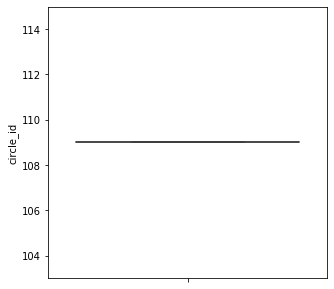

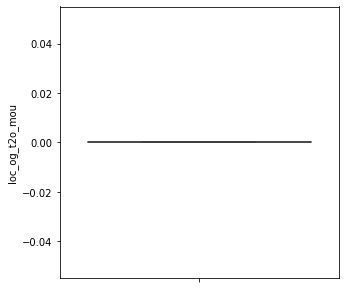

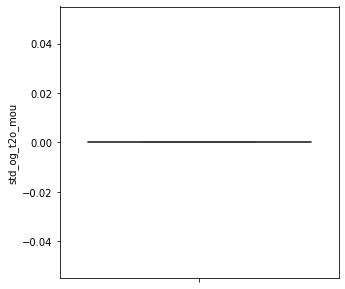

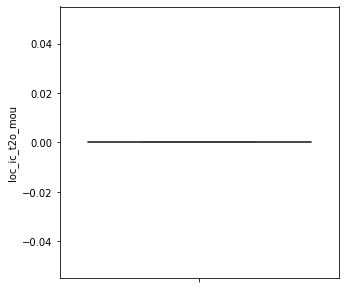

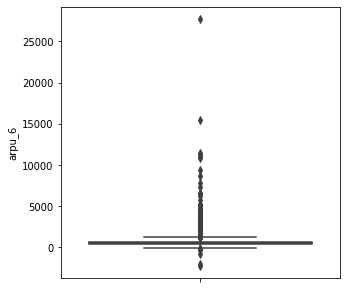

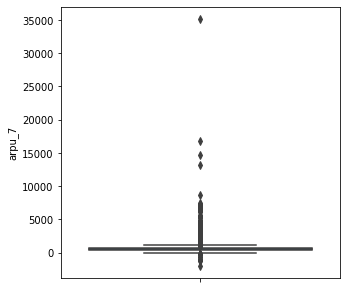

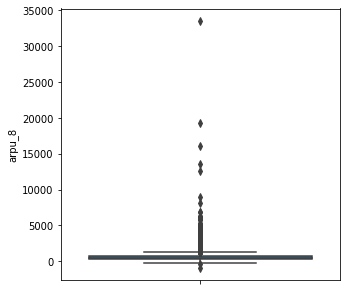

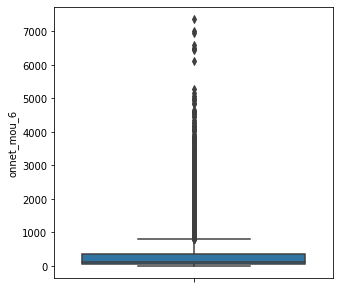

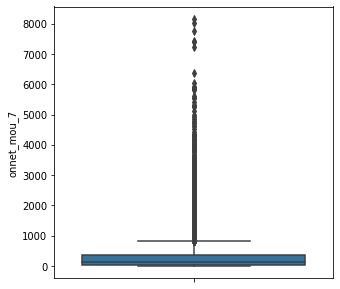

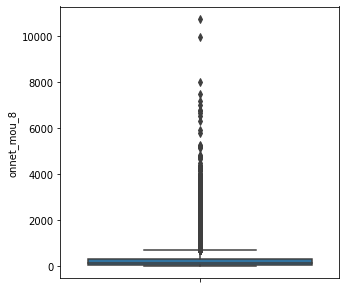

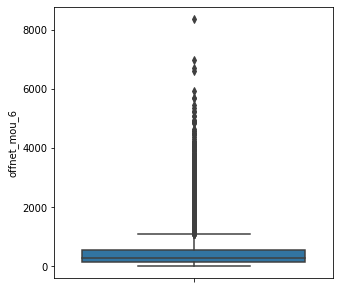

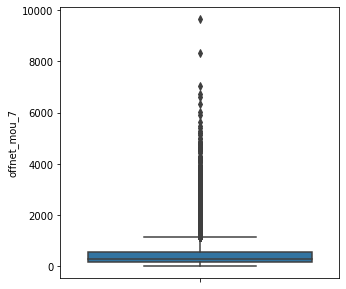

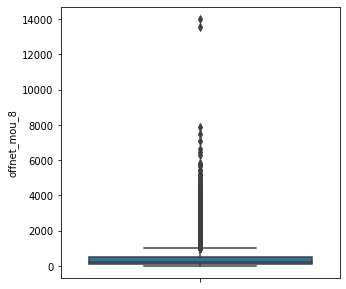

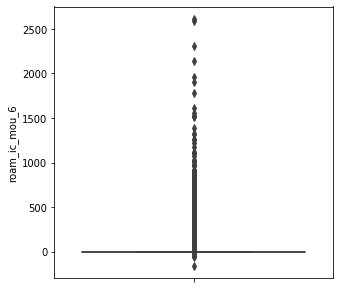

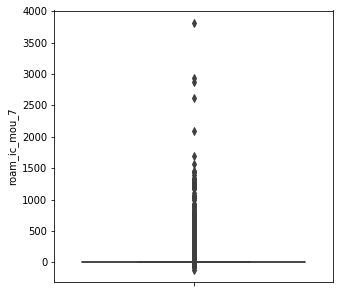

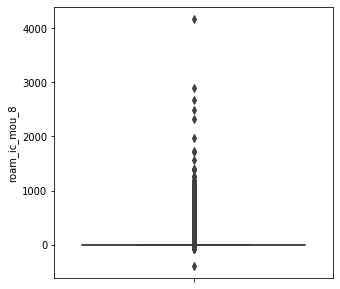

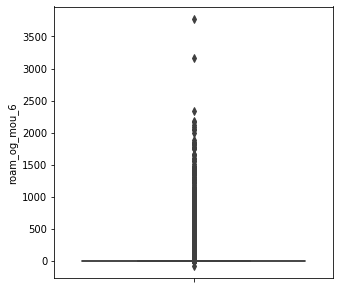

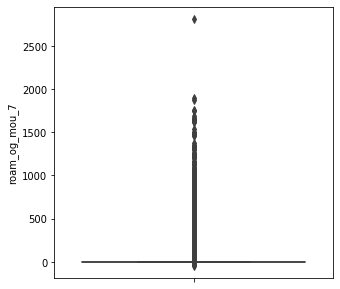

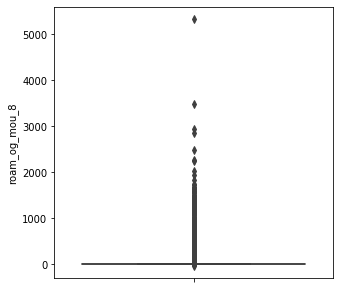

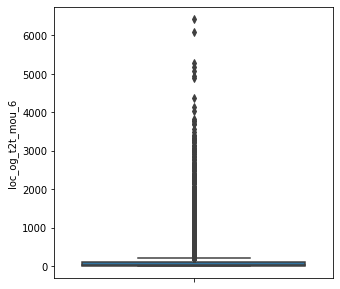

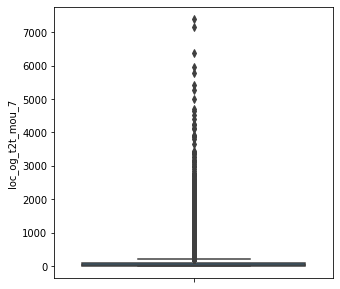

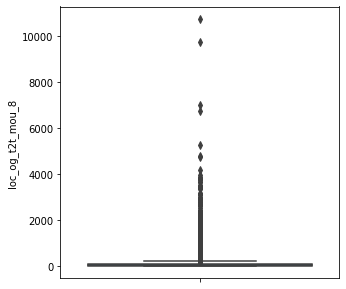

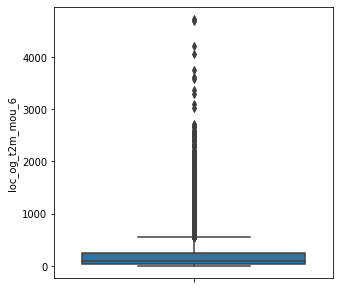

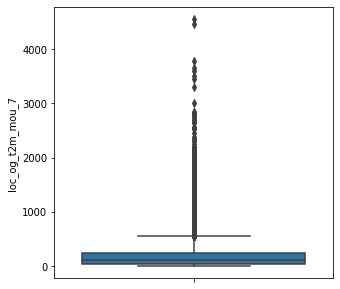

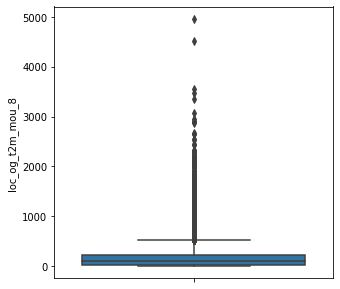

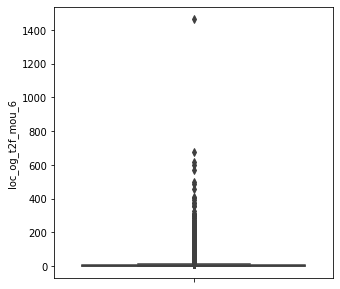

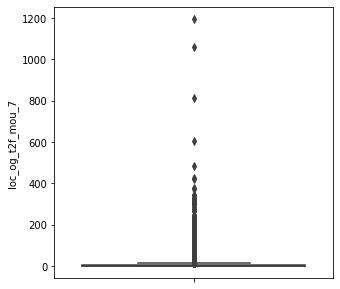

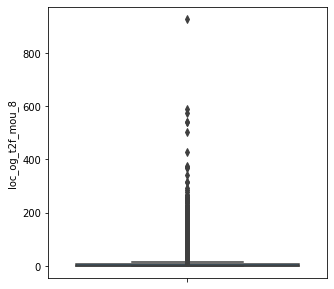

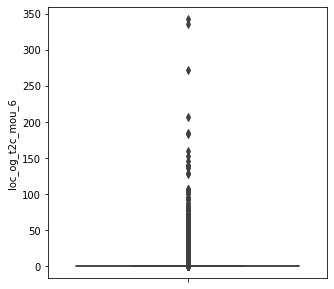

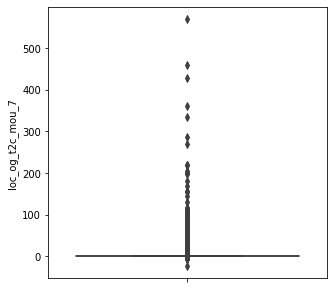

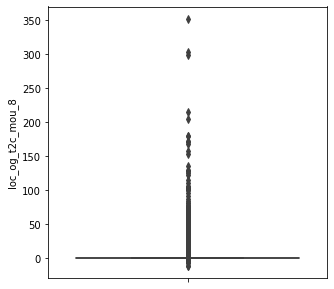

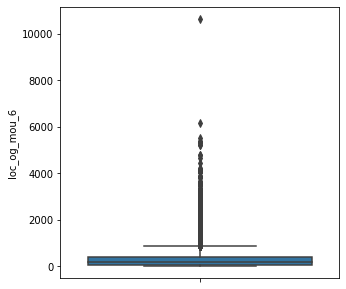

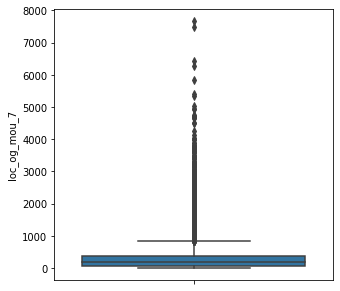

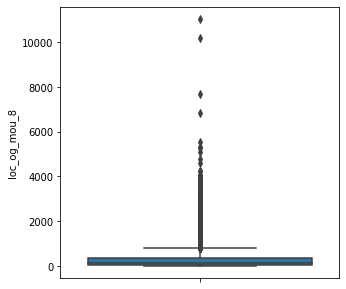

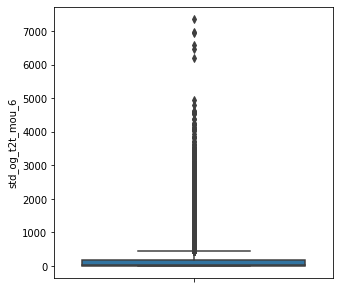

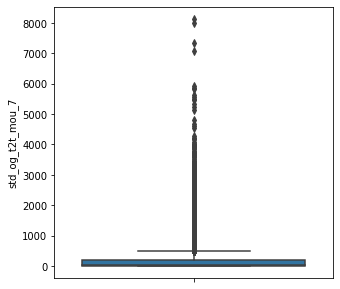

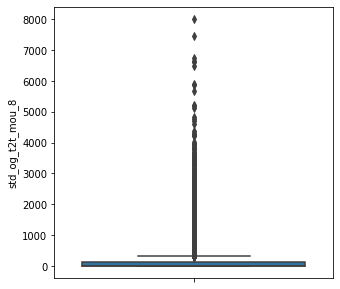

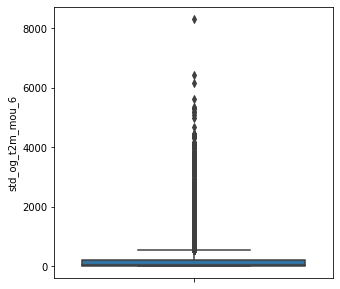

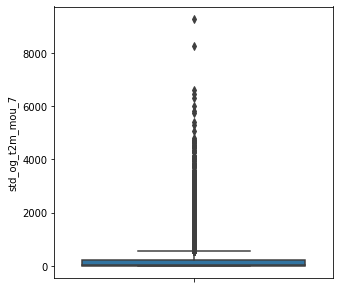

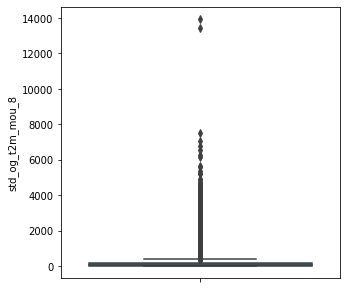

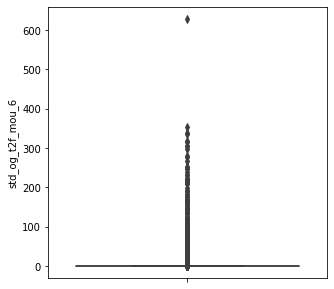

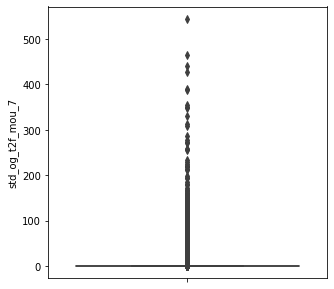

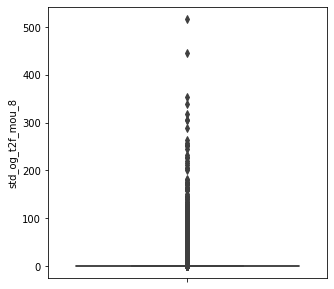

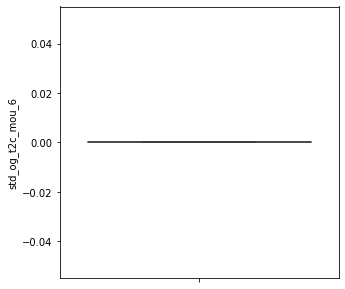

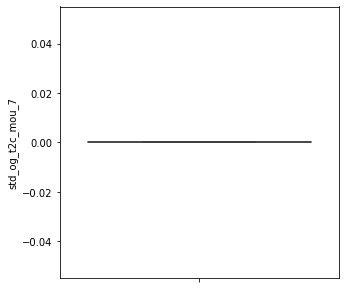

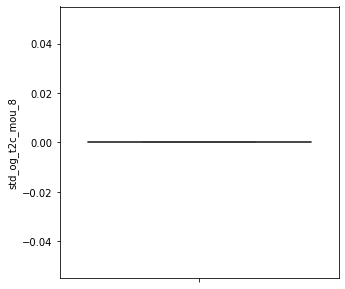

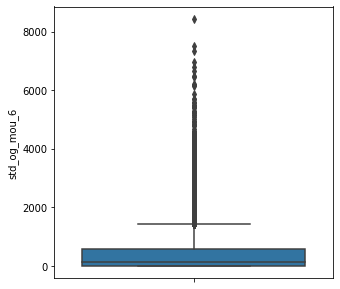

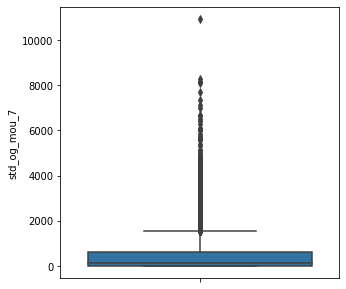

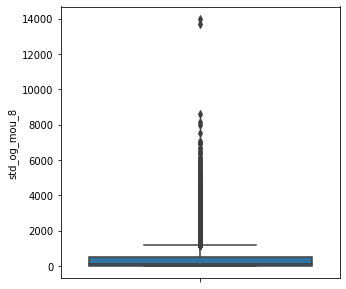

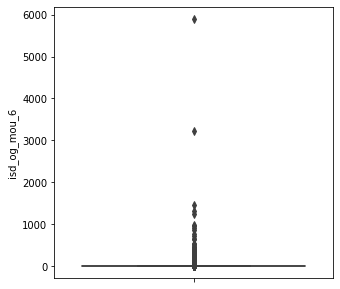

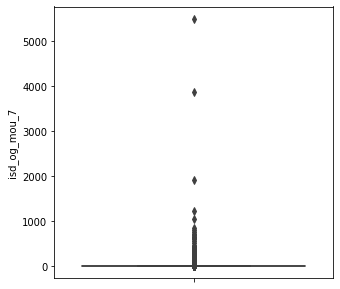

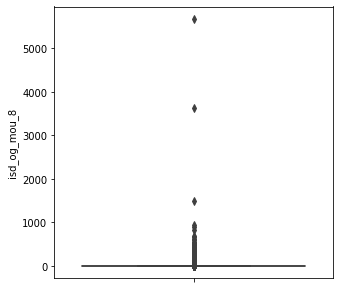

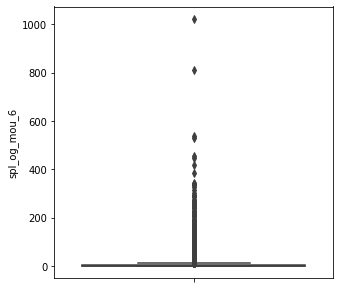

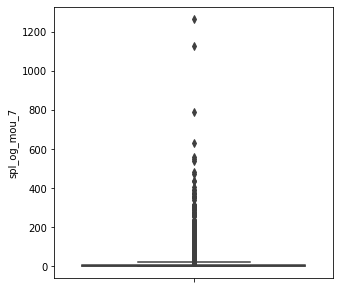

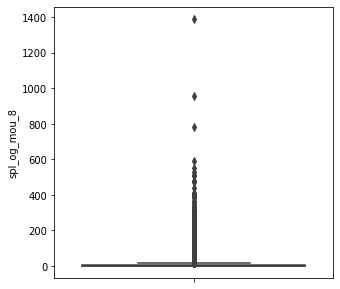

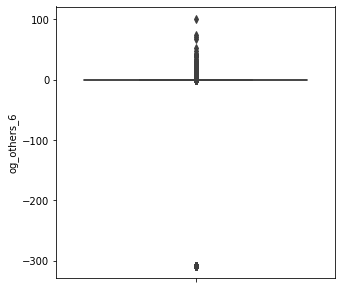

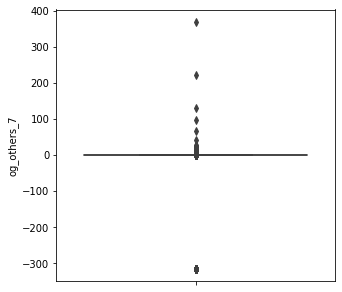

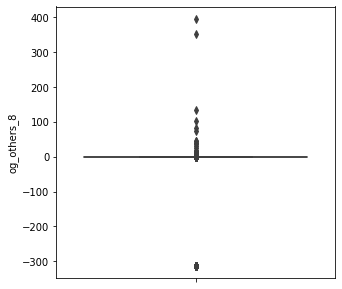

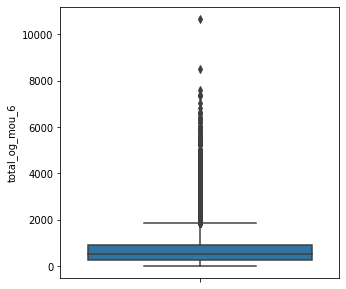

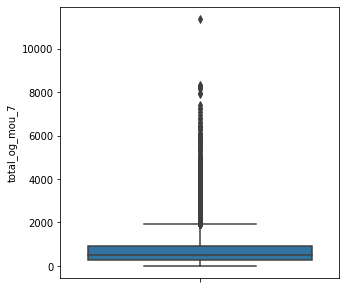

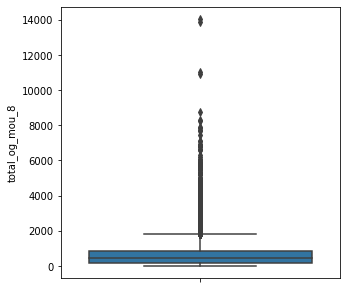

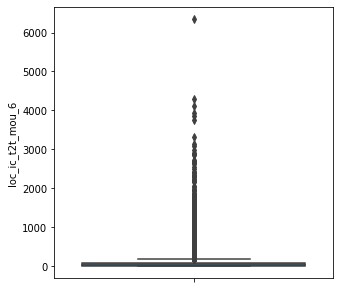

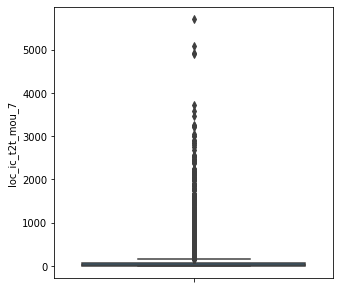

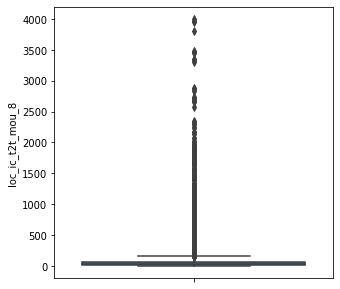

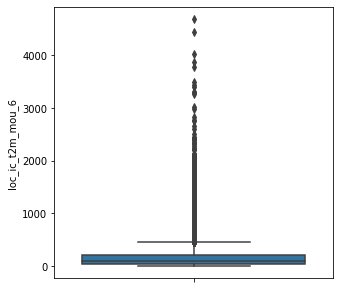

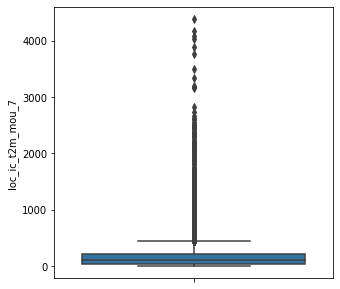

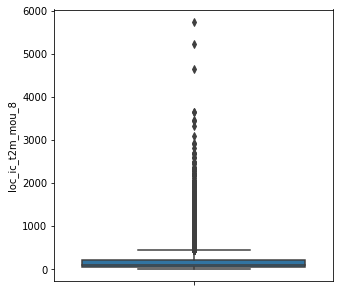

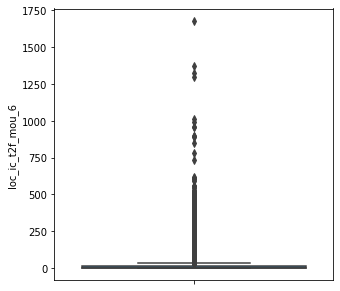

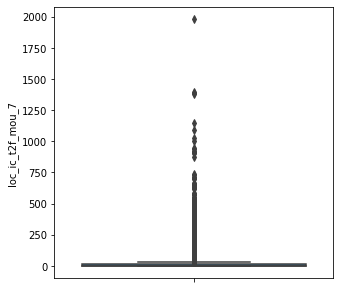

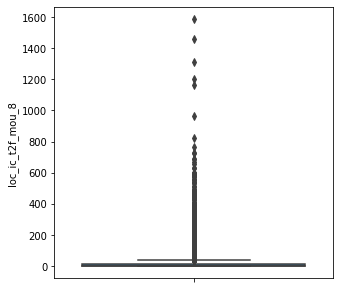

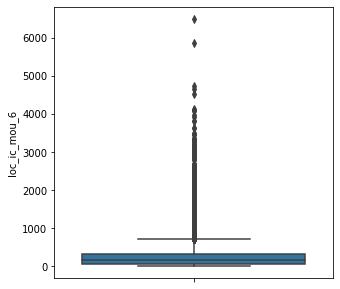

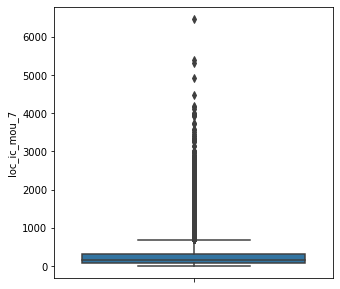

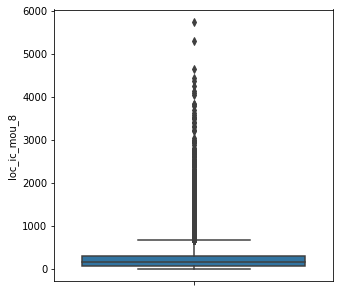

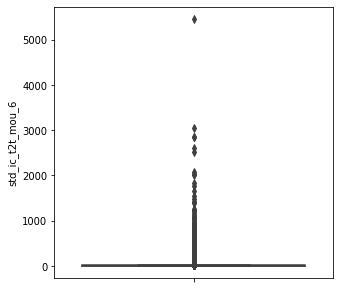

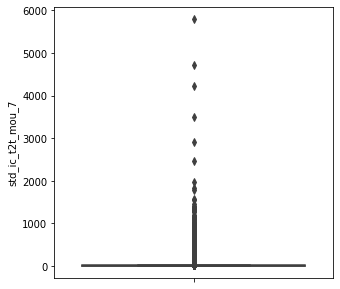

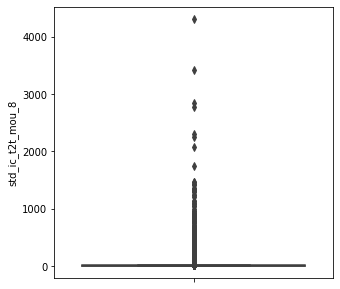

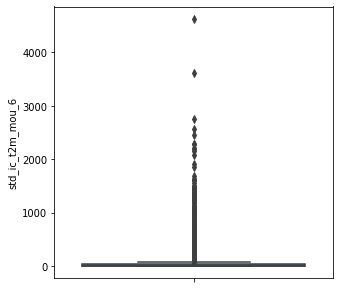

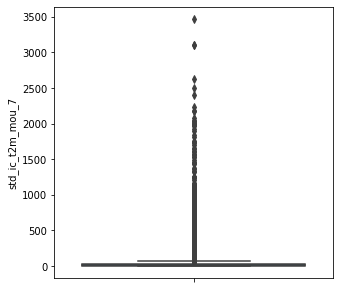

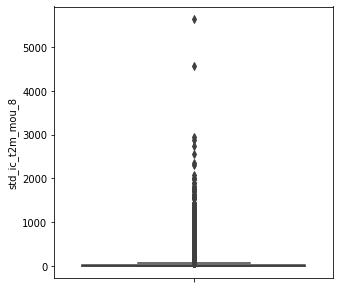

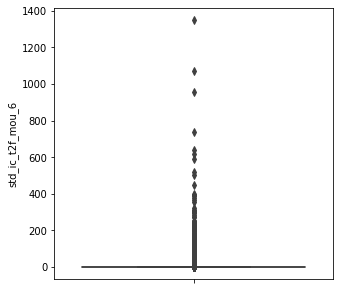

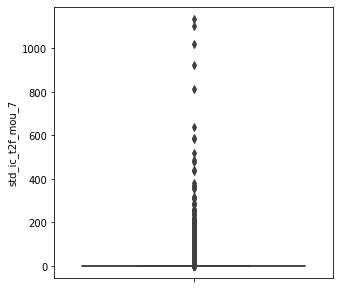

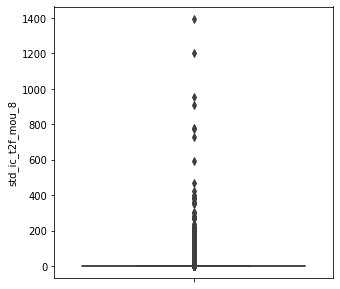

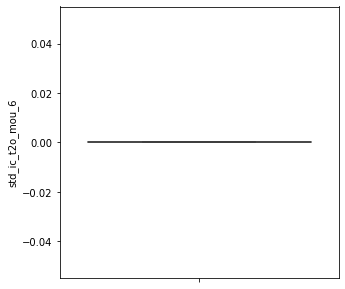

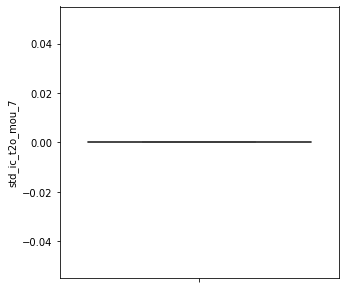

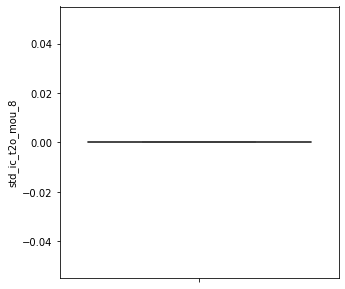

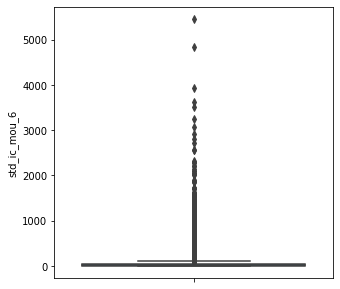

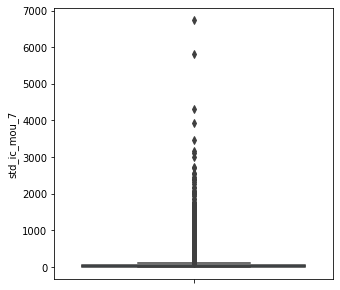

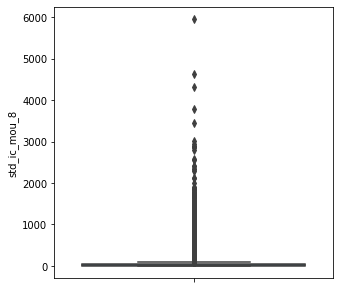

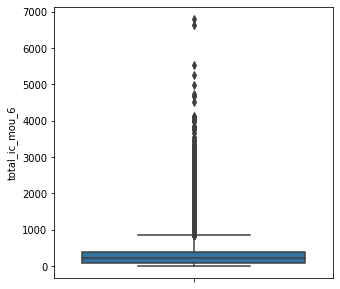

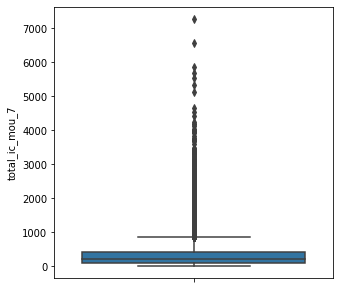

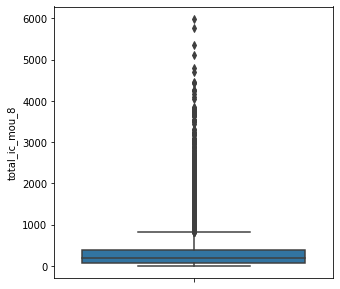

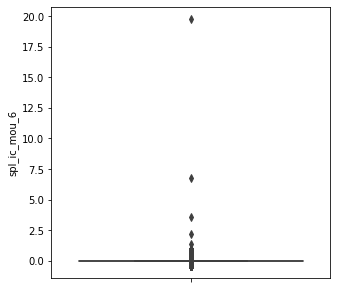

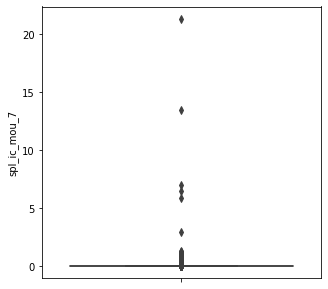

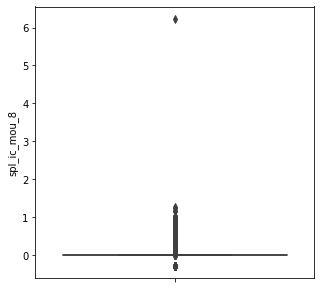

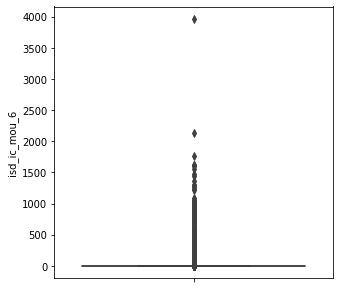

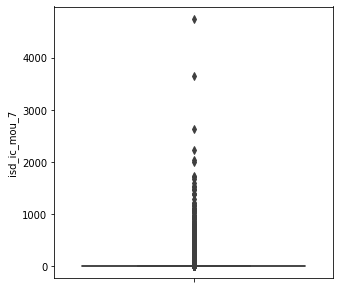

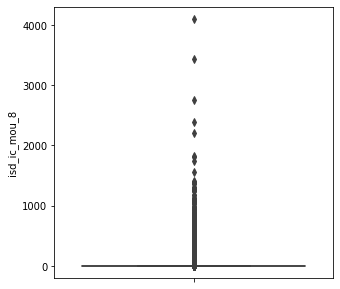

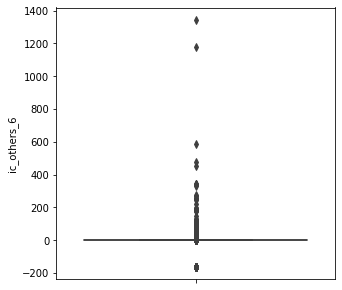

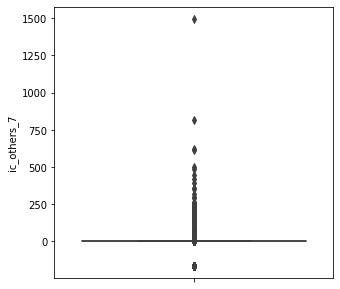

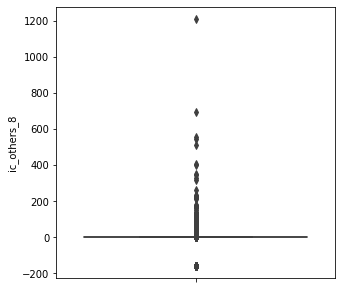

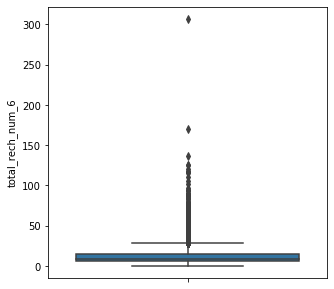

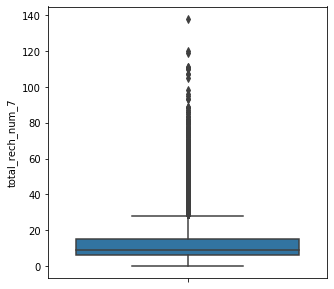

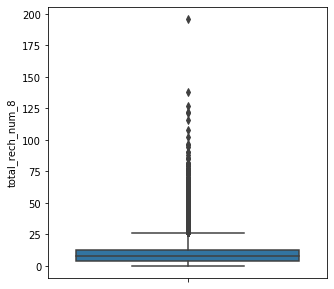

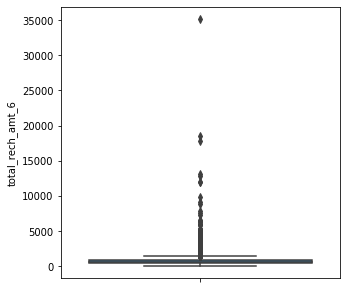

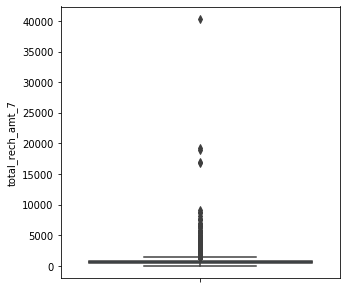

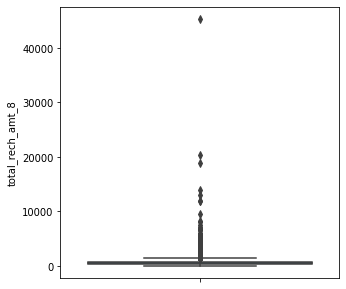

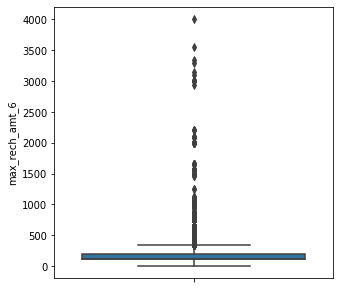

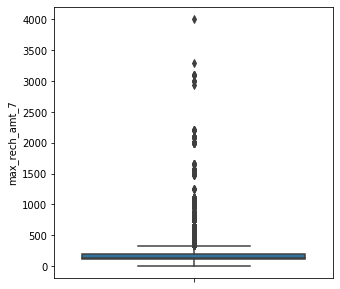

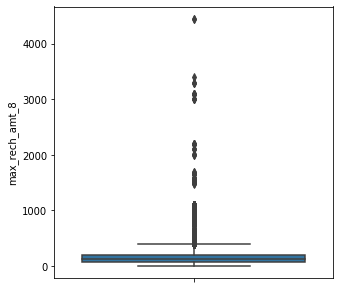

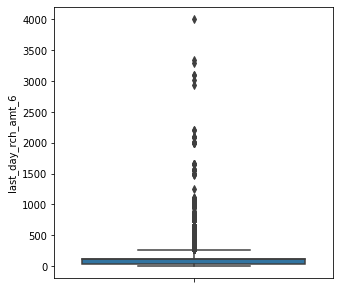

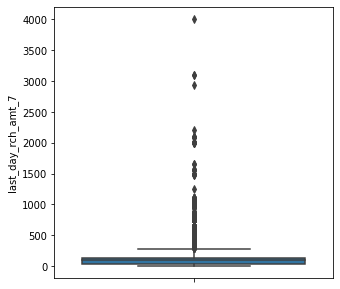

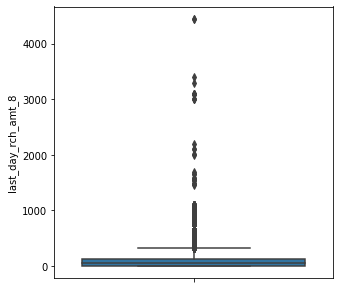

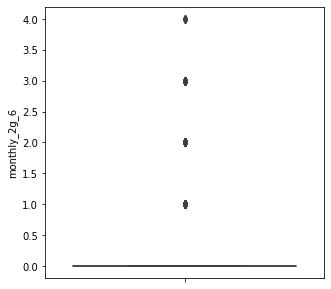

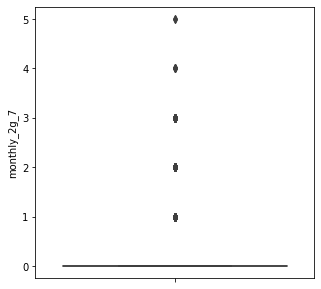

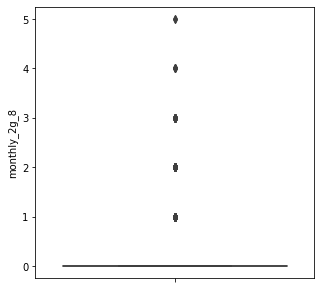

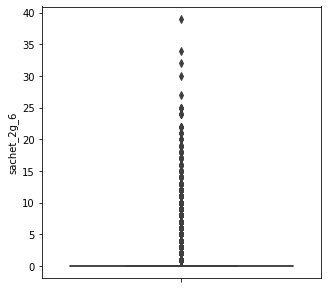

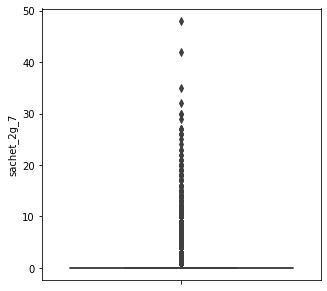

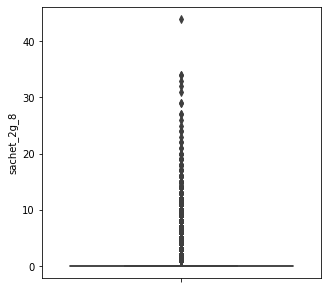

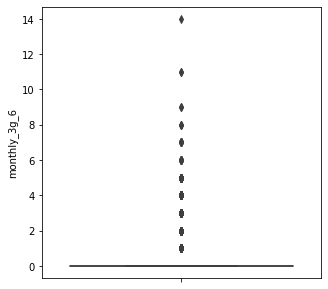

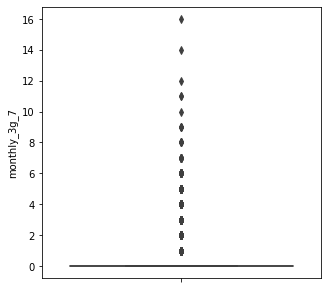

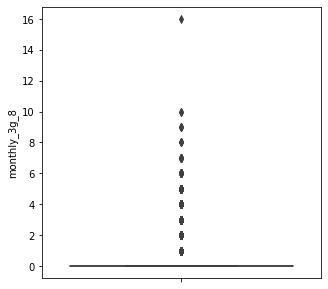

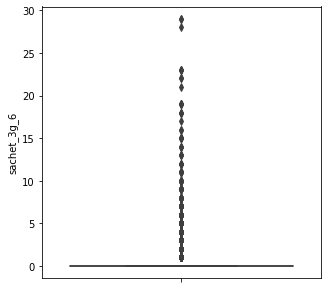

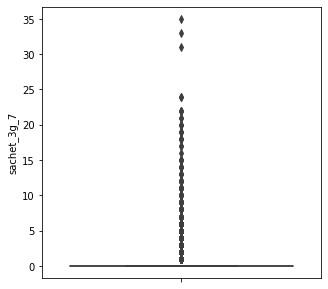

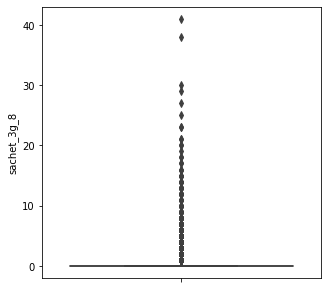

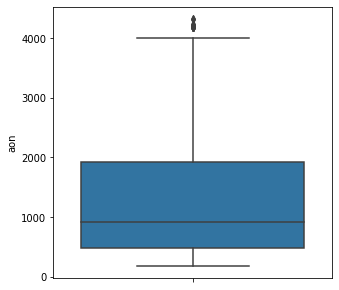

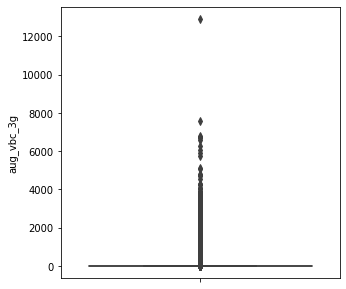

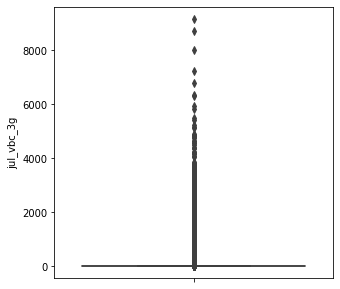

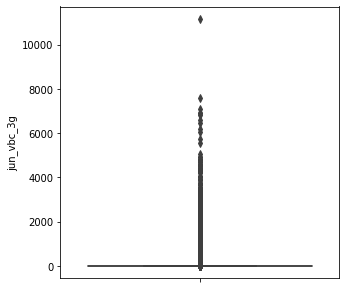

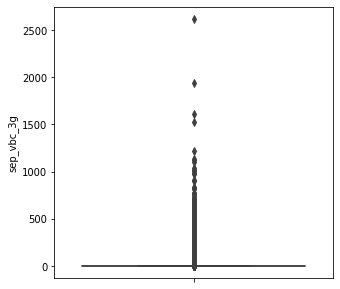

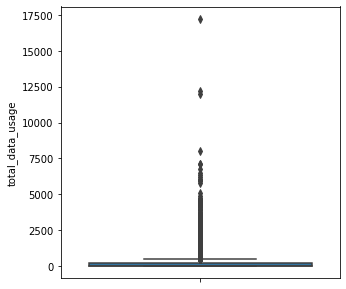

In [29]:
#plotting the boxplot
cont_cols = [col for col in tele_c.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize = (5, 5))
    sns.boxplot(y = col, data = tele_c)

In [30]:
#Check for variance of columns
tele_c.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_data_usage
count,2.997900e+04,29979.0,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.587624,589.424681,535.067748,297.630391,305.931767,...,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,6.554528,0.08636,172.224424
std,6.846594e+05,0.0,0.0,0.0,0.0,442.848876,463.049067,492.447887,460.242652,481.302032,...,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,48.630605,0.28090,410.639723
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7.000641e+09,109.0,0.0,0.0,0.0,364.352500,365.235000,289.782000,43.590000,43.370000,...,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,7.001232e+09,109.0,0.0,0.0,0.0,495.951000,493.781000,452.232000,130.890000,130.430000,...,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,7.001814e+09,109.0,0.0,0.0,0.0,704.184500,700.986000,671.349500,353.500000,360.360000,...,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,0.000000,0.00000,190.670833
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,29.000000,35.000000,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,1.00000,17228.670000


#### From we can note that some columns do not show variance in data thus dropping them

In [31]:
my_lis = list(tele_c.loc[:,tele_c.apply(pd.Series.nunique) == 1].columns)

In [32]:
tele_c = tele_c.drop(my_lis,axis = 1)

In [33]:
tele_c.shape

(29979, 122)

### 5.b Bar plot taking churn as categorical

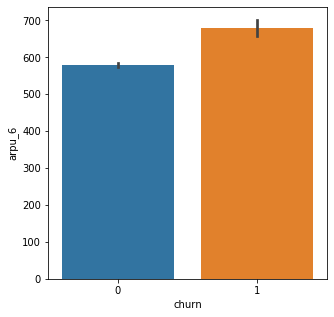

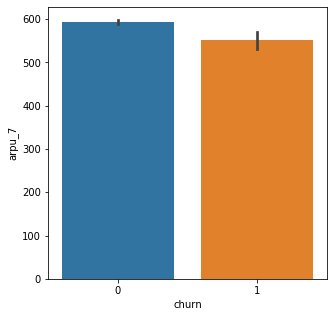

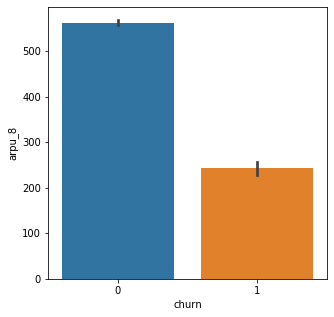

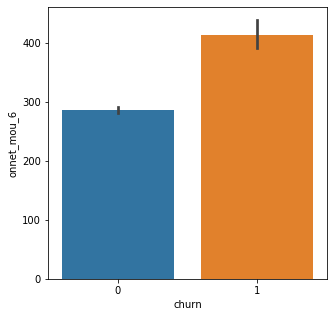

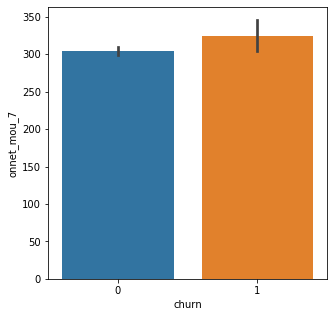

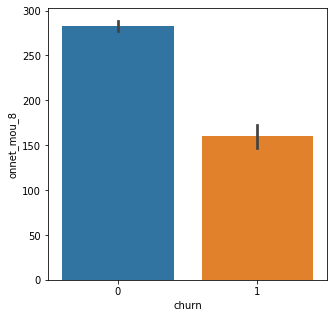

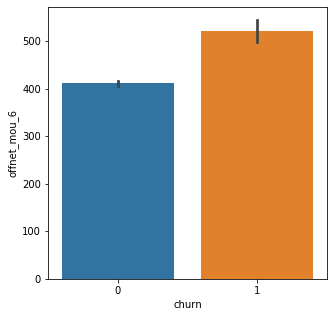

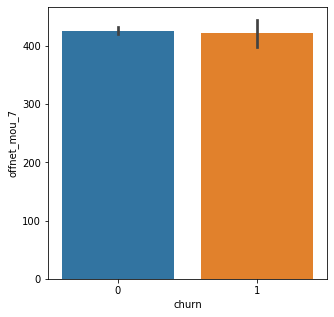

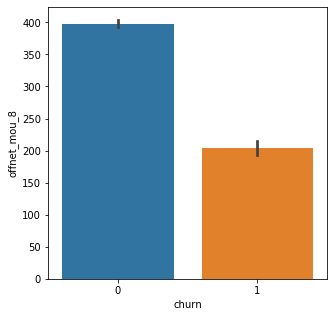

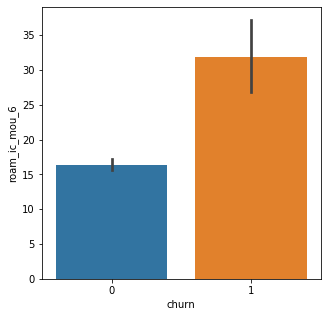

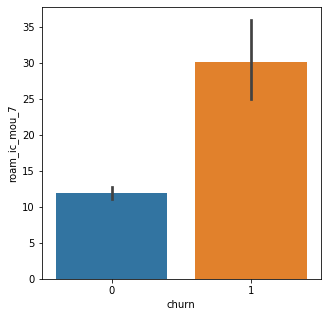

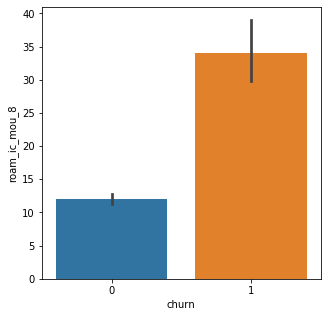

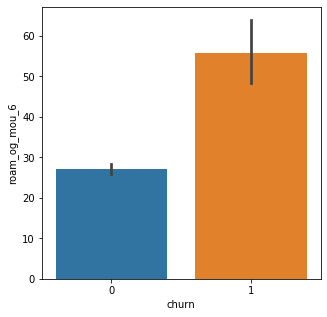

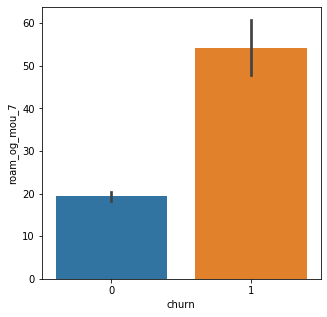

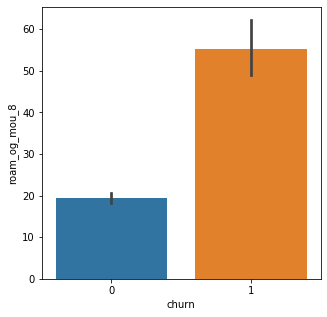

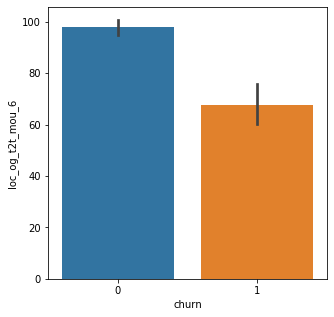

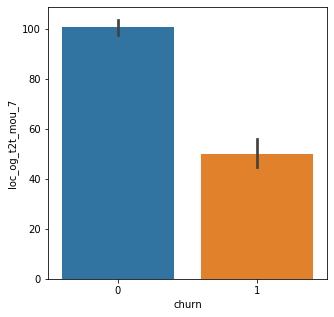

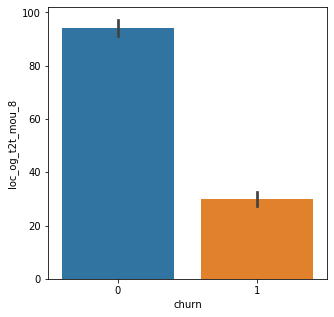

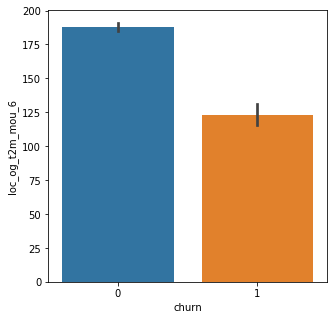

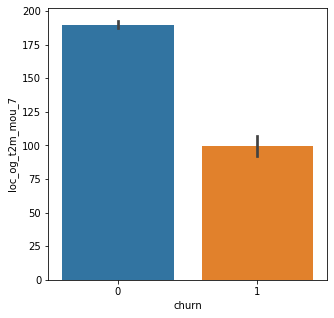

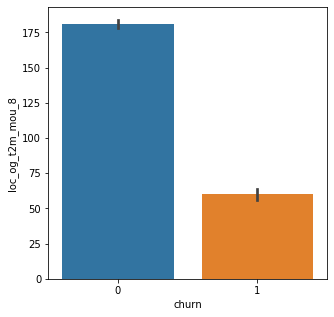

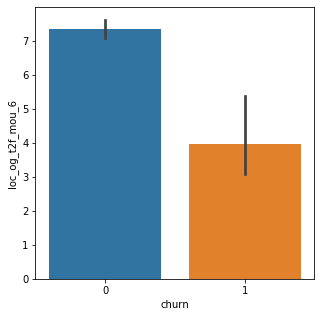

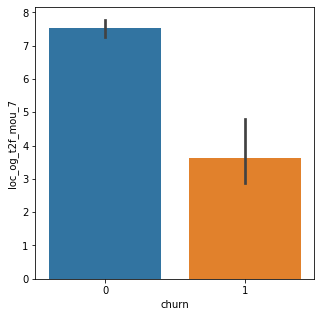

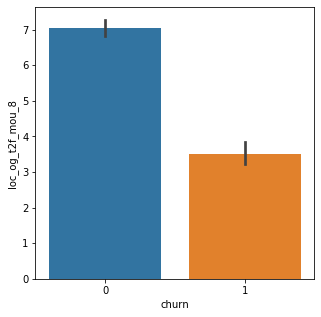

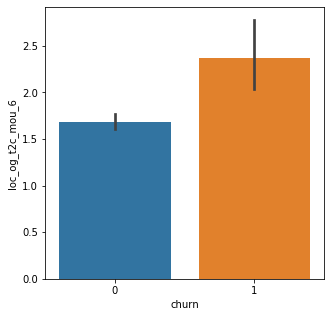

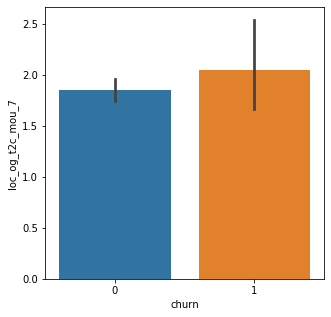

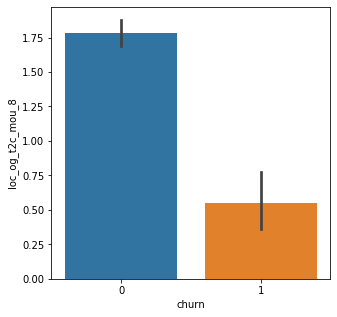

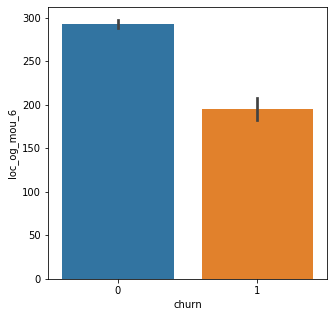

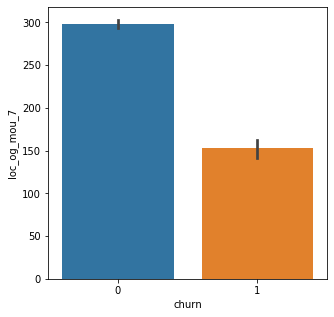

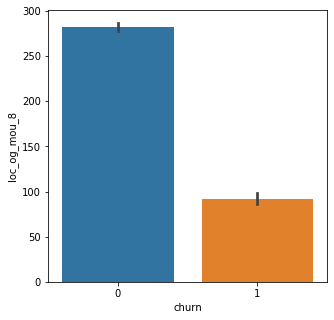

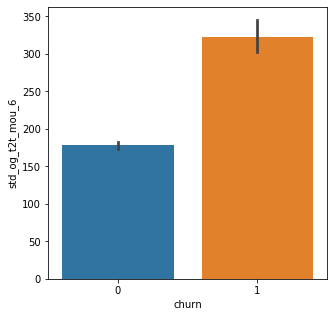

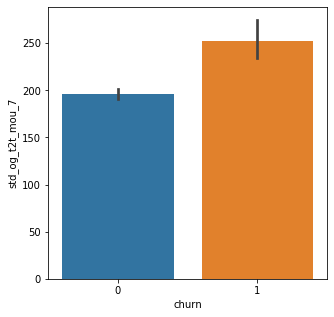

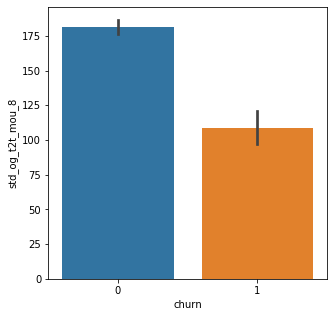

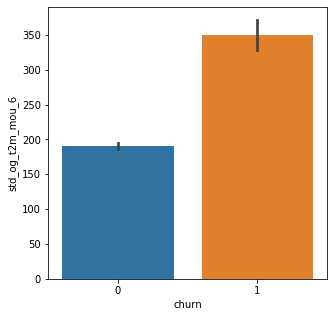

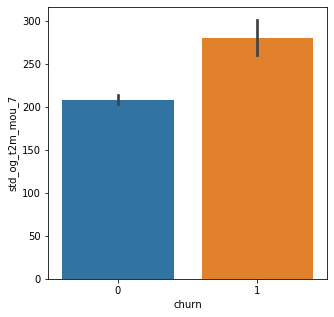

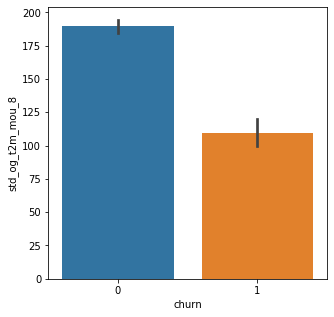

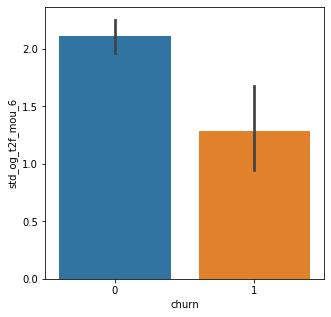

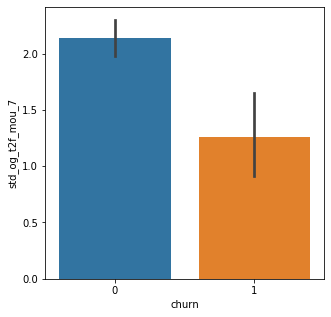

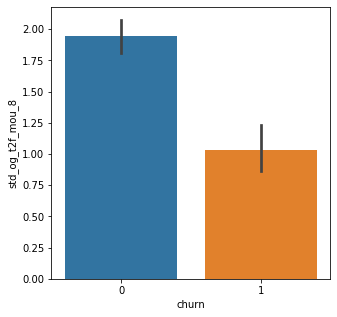

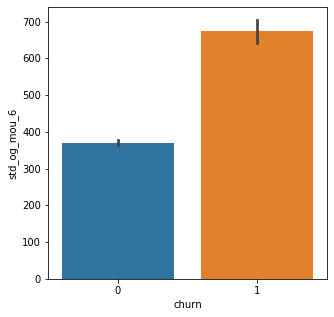

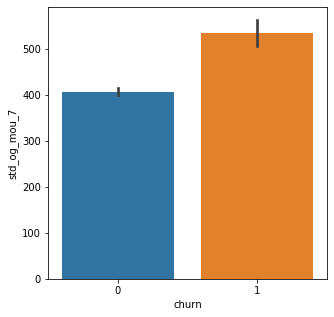

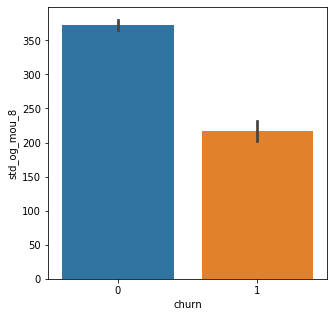

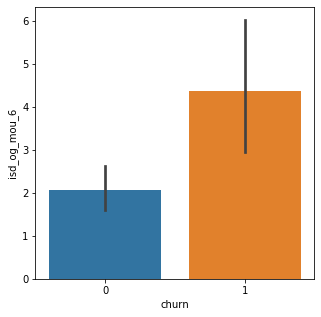

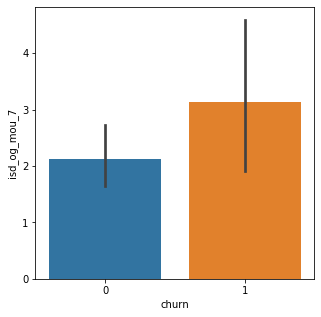

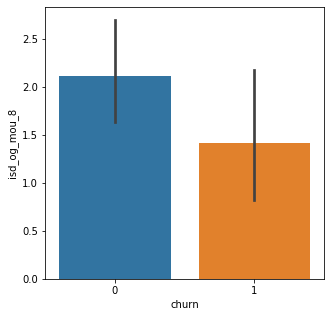

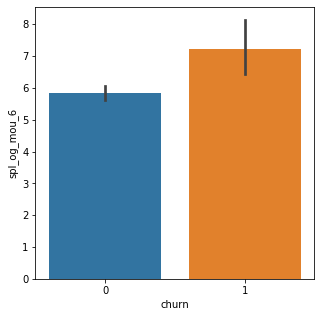

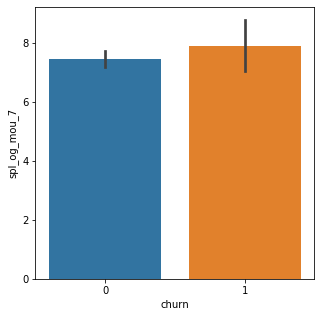

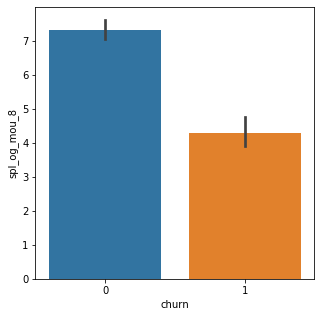

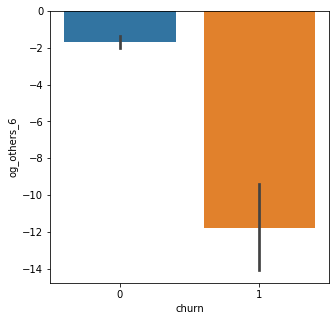

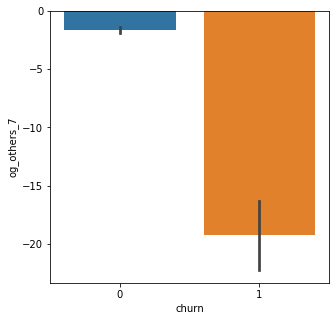

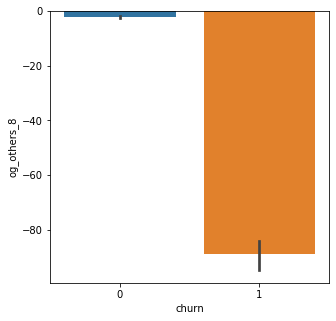

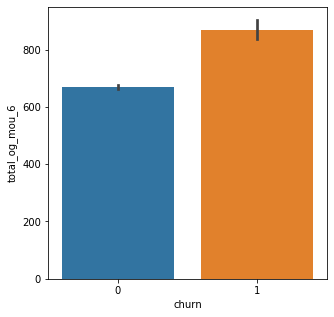

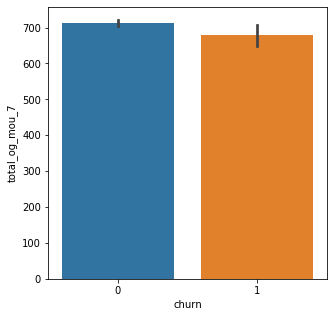

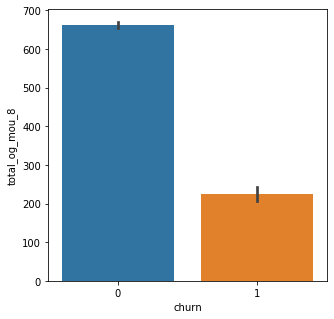

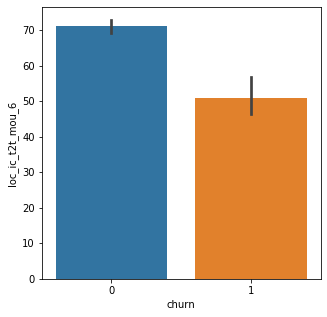

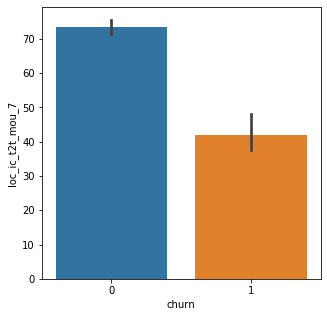

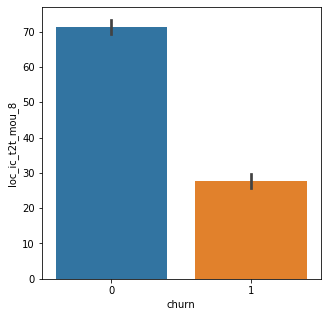

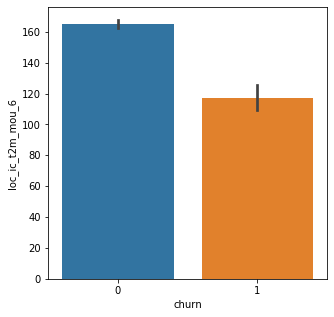

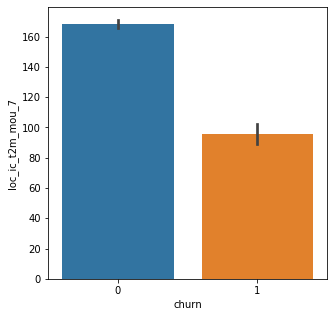

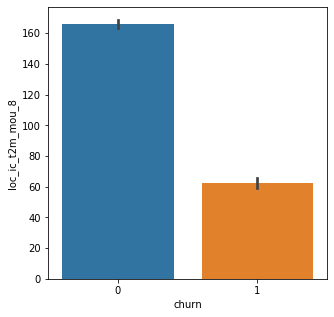

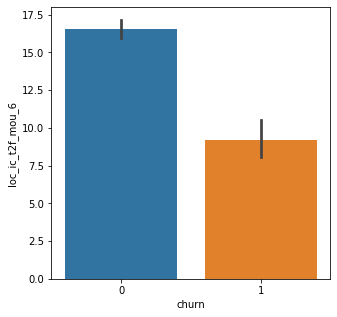

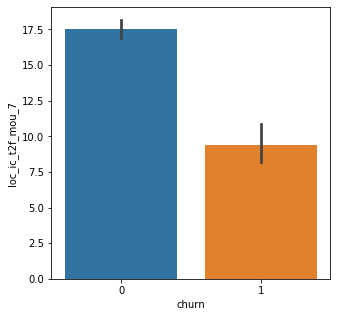

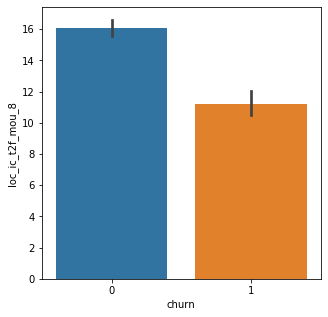

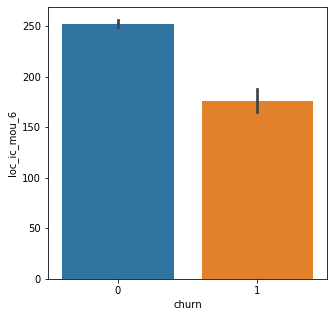

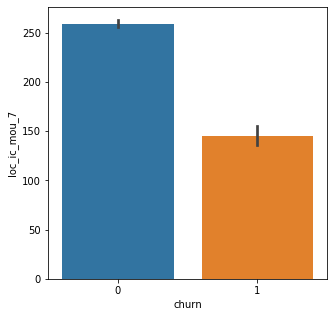

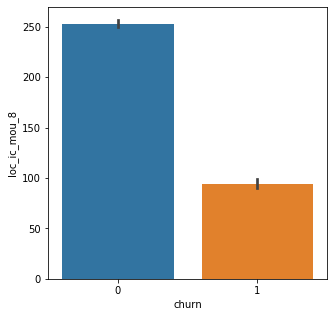

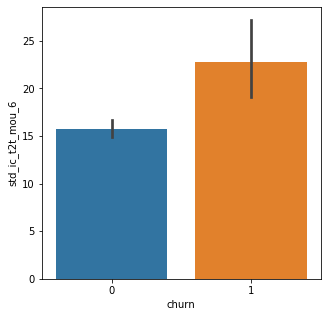

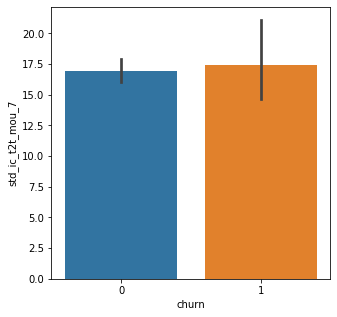

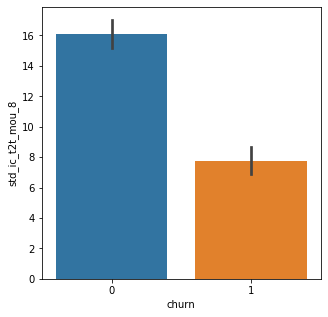

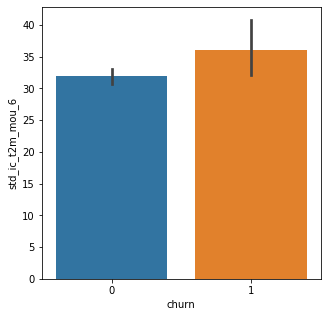

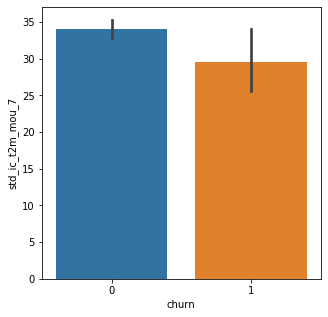

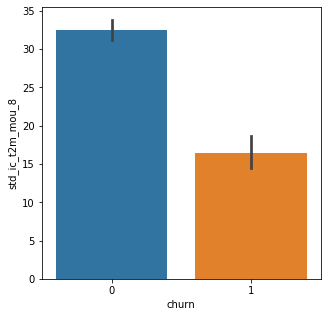

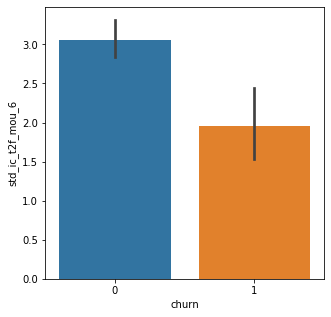

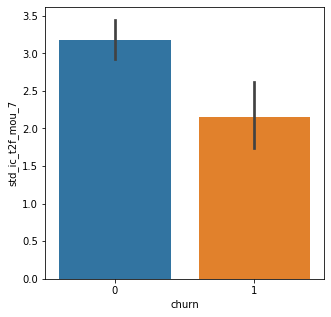

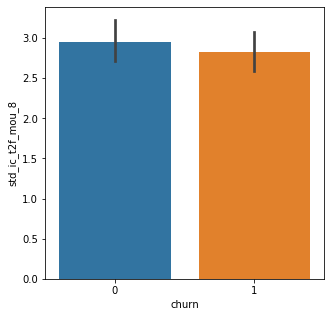

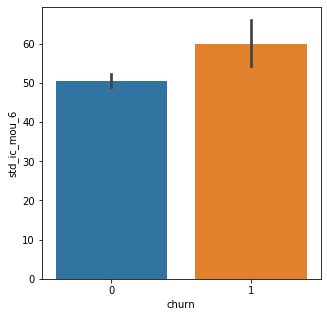

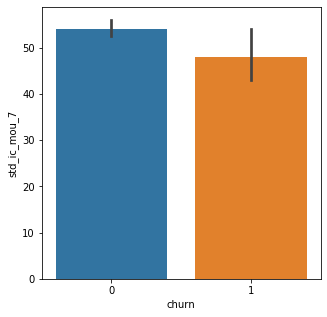

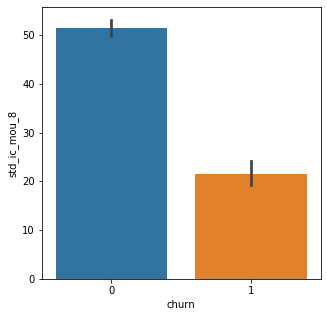

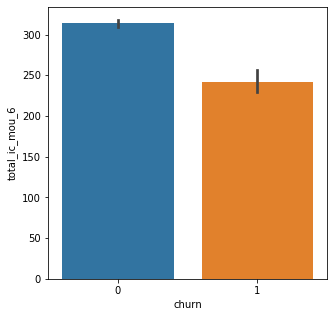

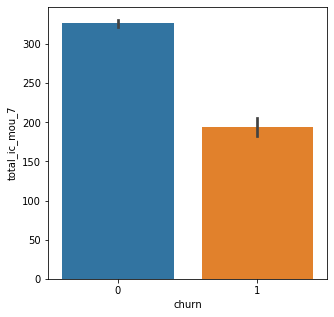

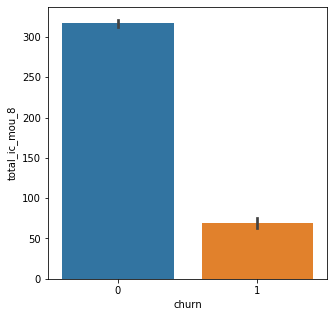

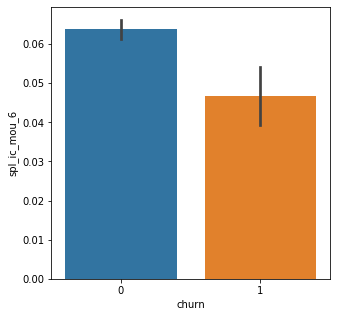

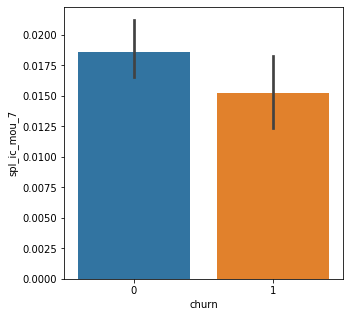

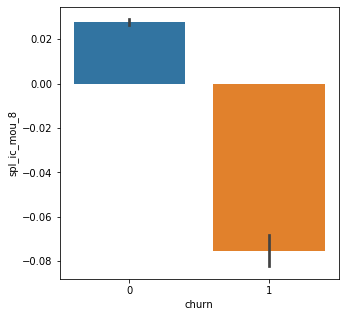

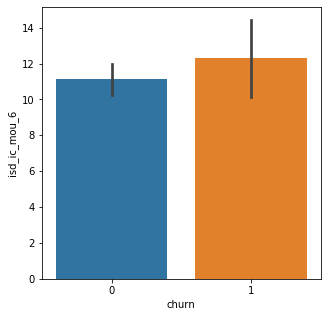

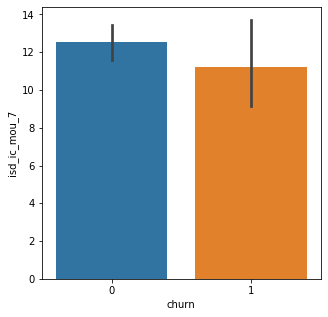

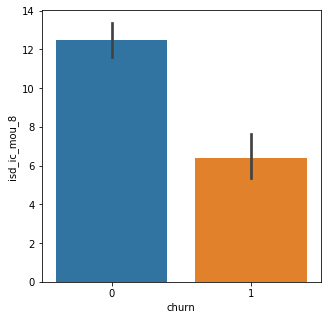

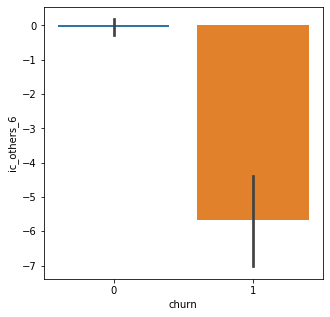

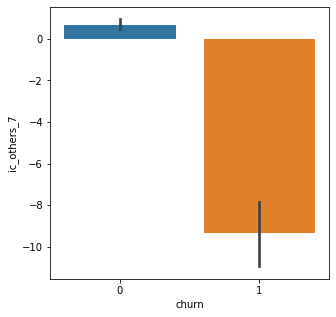

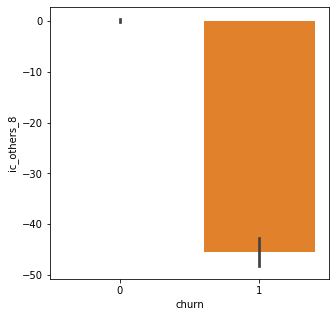

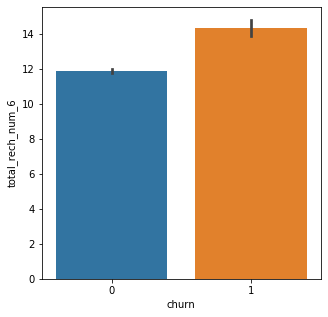

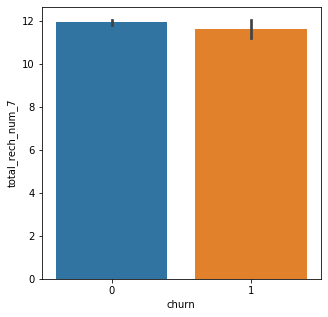

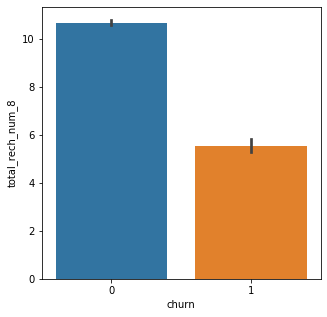

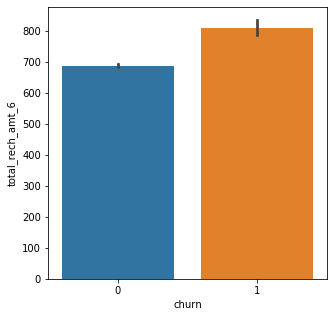

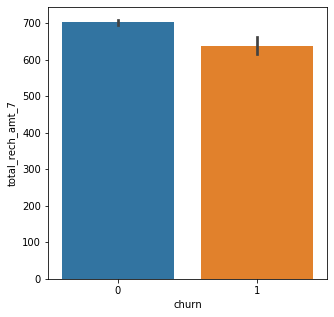

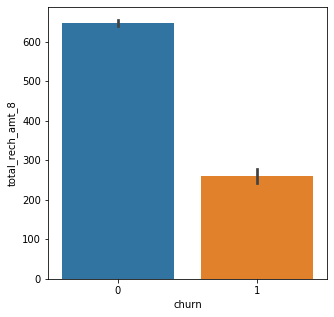

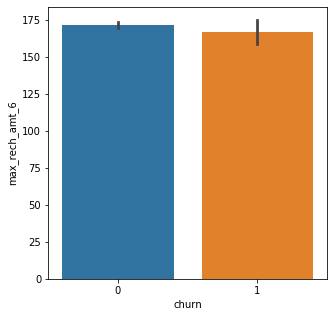

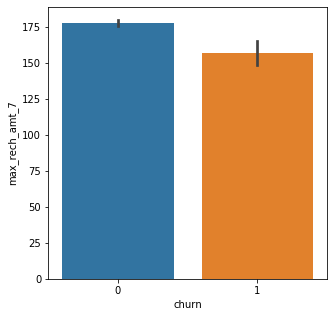

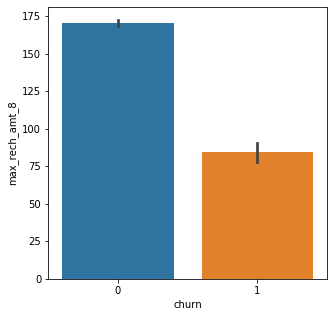

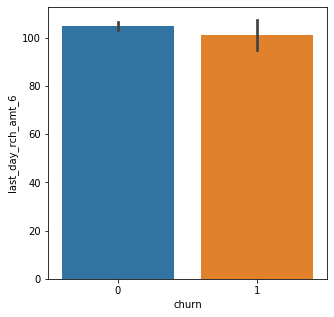

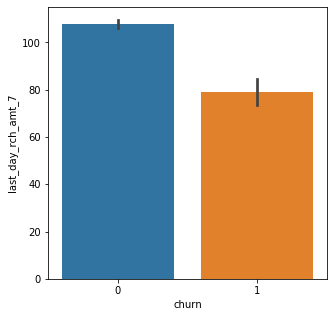

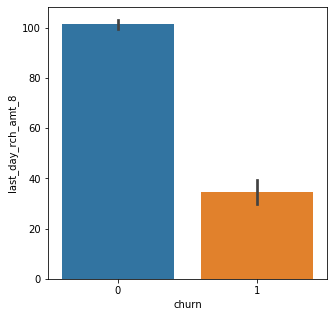

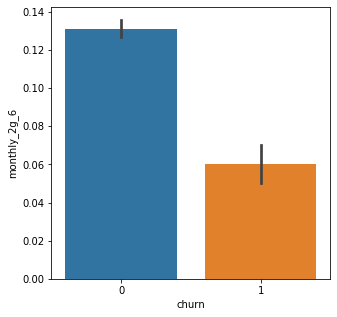

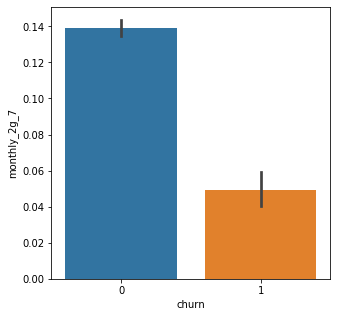

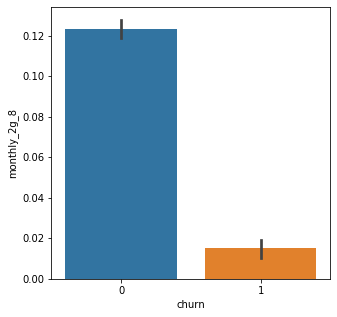

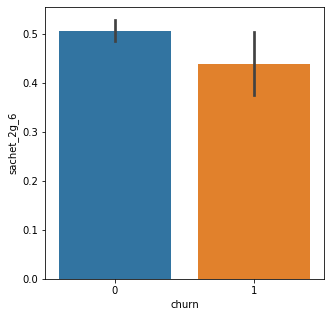

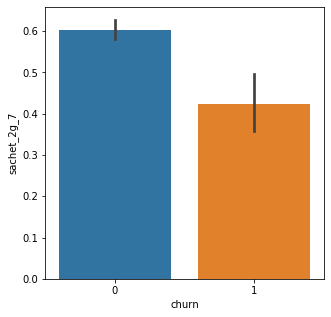

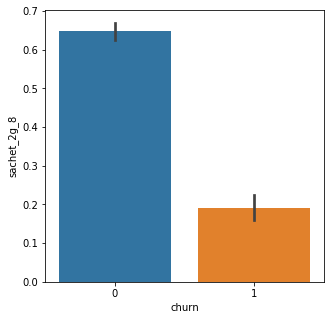

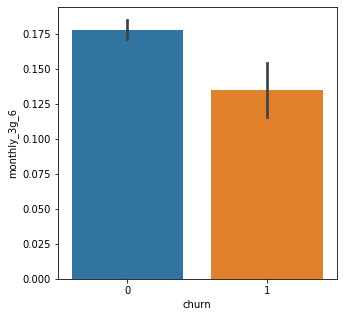

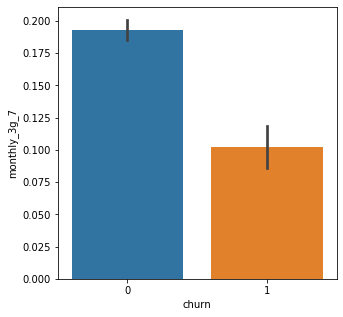

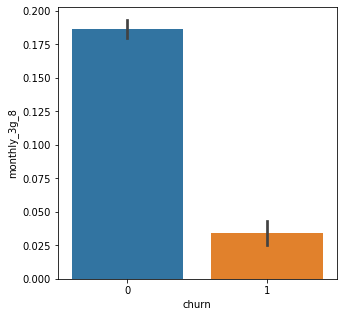

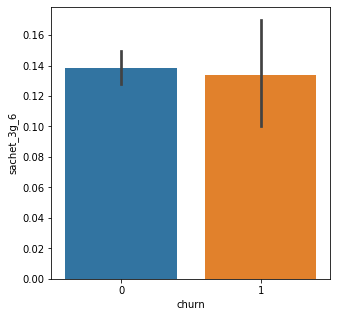

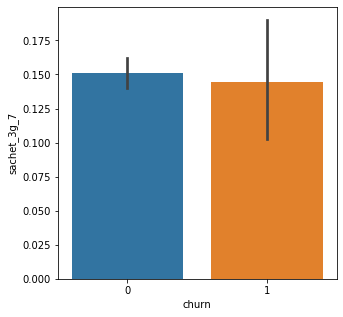

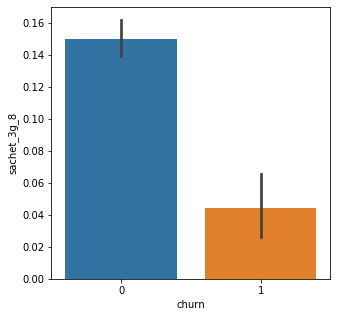

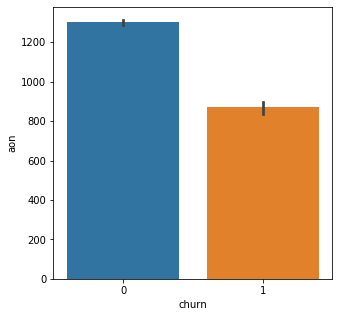

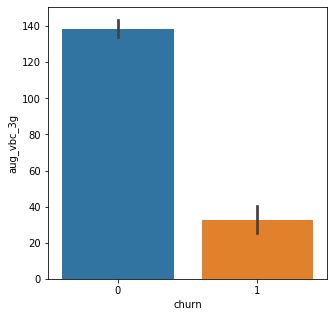

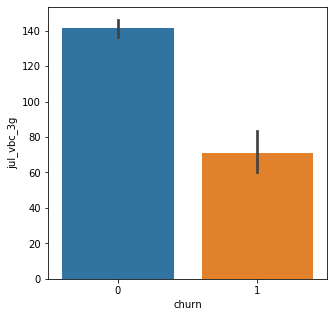

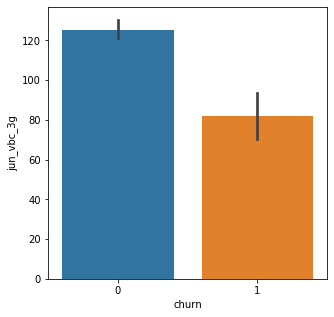

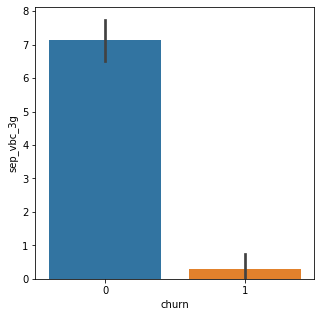

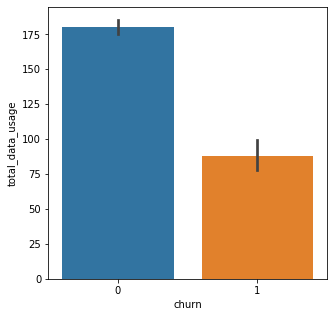

In [34]:
#plotting the bar plot
cont_cols = [col for col in tele_c.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize = (5, 5))
    sns.barplot(x = 'churn', y = col, data = tele_c)
    plt.show()


In [35]:
tele_c.shape

(29979, 122)

## Step 6: Outlier Analysis 

In [36]:
tele_c.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])
#As we can see we have outlier.

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_data_usage
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000
mean,7.001223e+09,587.587624,589.424681,535.067748,297.630391,305.931767,272.120875,420.223502,426.099490,381.185590,...,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,6.554528,0.08636,172.224424
std,6.846594e+05,442.848876,463.049067,492.447887,460.242652,481.302032,464.889137,469.347550,485.369807,474.087641,...,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,48.630605,0.28090,410.639723
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1%,7.000028e+09,18.221200,25.600600,0.000000,0.000000,0.000000,0.000000,1.057800,1.099000,0.000000,...,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
10%,7.000269e+09,270.692200,274.458200,134.118600,12.230000,11.726000,6.906000,58.606000,59.604000,35.072000,...,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7.000641e+09,364.352500,365.235000,289.782000,43.590000,43.370000,34.060000,142.860000,141.280000,111.780000,...,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,7.001232e+09,495.951000,493.781000,452.232000,130.890000,130.430000,113.290000,282.260000,282.040000,241.040000,...,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,7.001814e+09,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,...,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,0.000000,0.00000,190.670833
90%,7.002167e+09,994.311800,996.051400,985.499200,795.354000,825.486000,724.182000,916.490000,935.716000,854.006000,...,0.000000,0.000000,0.000000,2846.000000,439.100000,455.078000,395.168000,0.000000,0.00000,553.390000


In [37]:
#removing outliers
cont_cols = [col for col in tele_c.columns if col not in ['churn','mobile_number']]

for col in cont_cols:
    Q1 = tele_c[col].quantile(0.01)
    Q3 = tele_c[col].quantile(0.99)
    IQR = Q3 - Q1
    tele_c= tele_c[(tele_c[i] >= (Q1 - 1.5 * IQR)) & (tele_c[i] <= (Q3 + 1.5 * IQR))]

In [38]:
tele_c.shape

(27398, 122)

## Step 7 : Model Building

## Principal component analysis : to remove columns

In [39]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
#for implimenting pca
from sklearn.decomposition import PCA

#importing standard scalar for scaling
from sklearn.preprocessing import StandardScaler
#instantiating object
scaler = StandardScaler()

In [40]:
# Putting feature variable to X
X = tele_c.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = tele_c['churn']
X[X.columns] = scaler.fit_transform(X)

In [41]:
#divinding the dataframe to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [42]:
#applying PCA with 90% and checking the shape
pca = PCA(0.9)
data_pca = pca.fit_transform(X_train)
data_pca.shape

(19178, 47)

In [43]:
#components of PCA
pca.components_

array([[ 1.43438577e-01,  1.57053448e-01,  1.66026348e-01, ...,
         3.52516518e-02, -0.00000000e+00,  2.93283996e-02],
       [ 1.18335887e-01,  1.50337547e-01,  1.38833385e-01, ...,
        -4.94647158e-02,  0.00000000e+00, -4.89415130e-02],
       [ 1.68270818e-01,  1.94822772e-01,  1.79255126e-01, ...,
         1.46417150e-01, -0.00000000e+00,  1.88778874e-01],
       ...,
       [-1.35030254e-01,  3.03580378e-02,  9.89688791e-02, ...,
        -4.18172894e-01, -0.00000000e+00,  1.17843746e-03],
       [ 2.83182313e-02,  3.78334228e-04,  4.30030895e-02, ...,
         1.41280115e-01, -0.00000000e+00, -1.15336726e-02],
       [-2.43324965e-02,  1.63381756e-03,  4.03015910e-02, ...,
         1.26835256e-02,  0.00000000e+00,  1.52990039e-03]])

In [44]:
#explained variance ratio
pca.explained_variance_ratio_

array([0.10172283, 0.08872875, 0.05964916, 0.05038547, 0.03922011,
       0.03649117, 0.03450537, 0.0294509 , 0.02860682, 0.027422  ,
       0.02546472, 0.02305981, 0.02218894, 0.02179448, 0.01986674,
       0.01890352, 0.01764608, 0.01697539, 0.01597888, 0.01446038,
       0.01378348, 0.01335058, 0.01251875, 0.01197954, 0.01151829,
       0.01028979, 0.00940052, 0.00897686, 0.00836663, 0.0077954 ,
       0.00762476, 0.00759809, 0.00749142, 0.00703015, 0.00696342,
       0.00675609, 0.00647881, 0.0061398 , 0.00604111, 0.00574192,
       0.00520279, 0.0050487 , 0.00496972, 0.00475481, 0.00425463,
       0.00414107, 0.00409375])

Text(0, 0.5, 'Cumulative_variance')

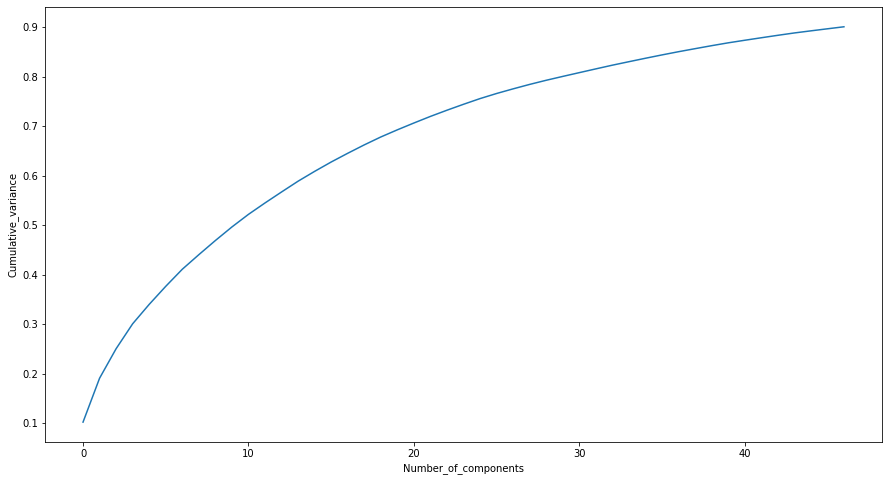

In [45]:
#plot depicting number_of_components v/s cumulative_cariance
%matplotlib inline
fig = plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number_of_components')
plt.ylabel('Cumulative_variance')

## From above we can can conclude that 90% of data is explained by 45+ components thus 47 is good

In [46]:
#fit and transform the train data
df_train = pca.fit_transform(X_train)

In [47]:
df_train.shape

(19178, 47)

## Model 1: Logistic Regression with PCA

In [48]:
#importing library for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [49]:
#creating instance of logistic regression
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train,y_train)

C:\Users\shian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
#transforming the test data
df_test = pca.transform(X_test)

In [51]:
#predicting the model
pred_probs_test = model_pca.predict_proba(df_test)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [52]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test)
y_pred_default = model_pca.predict(df_test)

In [53]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test[:,1])
y_pred_df.head()

,0
0,0.659042
1,0.018632
2,0.053632
3,0.544119
4,0.467536


In [54]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
10124,0
52732,0
47458,0
91826,0
69396,0


In [55]:
#reseting the index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [56]:
#building final model
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)

In [57]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_prob'})

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8928989152790149


### ROC Curve 

In [59]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

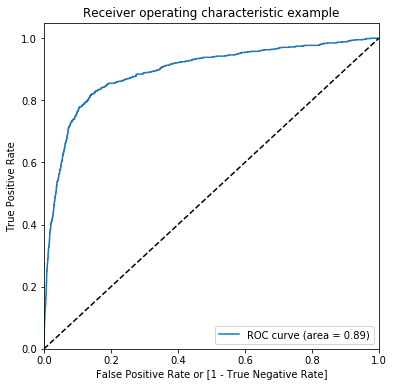

(array([0.        , 0.        , 0.        , ..., 0.99973126, 0.99986563,
        1.        ]),
 array([0.        , 0.00128535, 0.00257069, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99961755e+00, 9.99617554e-01, 9.99550940e-01, ...,
        2.47930351e-05, 8.96057630e-06, 1.17024265e-07]))

In [60]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [61]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.659042,1,1,1,1,1,1,1,0,0,0
1,0,0.018632,1,0,0,0,0,0,0,0,0,0
2,0,0.053632,1,0,0,0,0,0,0,0,0,0
3,0,0.544119,1,1,1,1,1,1,0,0,0,0
4,0,0.467536,1,1,1,1,1,0,0,0,0,0


In [62]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.094647  0.000000  1.000000
0.1   0.1  0.332847  0.266058  0.971722
0.2   0.2  0.527494  0.484278  0.940874
0.3   0.3  0.667640  0.642300  0.910026
0.4   0.4  0.778467  0.769820  0.861183
0.5   0.5  0.848054  0.850712  0.822622
0.6   0.6  0.889051  0.903117  0.754499
0.7   0.7  0.910949  0.938189  0.650386
0.8   0.8  0.920803  0.963316  0.514139
0.9   0.9  0.925061  0.982666  0.374036


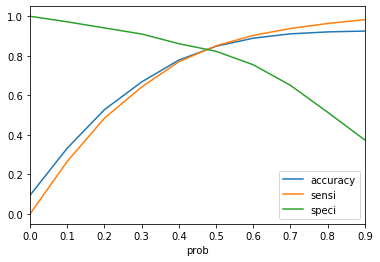

In [63]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [64]:
## Finding the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.4764042068526468]


C:\Users\shian\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [65]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.489 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.476 else 0)
y_pred_final.churn.value_counts()

0    7442
1     778
Name: churn, dtype: int64

### Confusion matrix 

In [66]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6218, 1224],
       [ 128,  650]], dtype=int64)

### Result of Logistic Regression model matrix with PCA 

In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8480535279805352
Sensitivity:  0.8354755784061697
Specificity:  0.8355280838484278
false postive rate:  0.16447191615157217
positive predictive value:  0.3468516542155816
Negative predictive value:  0.9798298140560984
Misclassification Rate:  0.16447688564476887


# Model 2:- Logistic Regression with RFE 

As pca has already selected 47 features now we will select around 15 features with RFE

### Applying R.F.E. 

In [69]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression
#creating instance
logreg = LogisticRegression()

#importing for RFE
from sklearn.feature_selection import RFE
#selecting no of features = 15
rfe = RFE(logreg, 15)      
#fitting the data
rfe = rfe.fit(X_train, y_train)

In [70]:
#retreiving columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8', 'aon'],
      dtype='object')

In [71]:
#importing statsmodel for model building
import statsmodels.api as sm
#building the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
#adding constant
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#getting the summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19178
Model:                            GLM   Df Residuals:                    19162
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3806.8
Date:                Mon, 18 May 2020   Deviance:                       7613.5
Time:                        16:22:17   Pearson chi2:                 2.13e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6995      0.066    -56.481      0.000      -3.828      -3.571
arpu_7                 0.5568      0.046     12.114      0.000       0.467       0.647
offnet_mou_8          -0.7514      0.164     -4.570      0.000      -1.074      -0.429
roam_og_mou_8          0.3073      0.029     10.657      0.000       0.251       0.364
std_og_t2m_mou_8       0.7008      0.156      4.490      0.000       0.395       1.007
og_others_8           -0.5297      0.035    -15.288      0.000      -0.598      -0.462
total_og_mou_8        -0.4347      0.079     -5.534      0.000      -0.589      -0.281
loc_ic_mou_7           0.5872      0.067      8.775      0.000       0.456       0.718
loc_ic_mou_8          -1.8859      0.143    -13.204      0.000      -2.166      -1.606
spl_ic_mou_8          -0.3069      0.060     -5.143      0.000      -0.424      -0.190
total_rech_num_8      -0.3474      0.052     -6.652      0.000      -0.450      -0.245
total_rech_amt_8      -0.4239      0.054     -7.874      0.000      -0.529      -0.318
last_day_rch_amt_8    -0.4658      0.061     -7.656      0.000      -0.585      -0.347
monthly_2g_8          -0.4511      0.066     -6.835      0.000      -0.581      -0.322
monthly_3g_8          -0.7000      0.082     -8.548      0.000      -0.860      -0.539
aon                   -0.2919      0.040     -7.226      0.000      -0.371      -0.213
======================================================================================
"""

## Check for vif 

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,6.27
3,std_og_t2m_mou_8,5.14
10,total_rech_amt_8,3.81
7,loc_ic_mou_8,3.61
6,loc_ic_mou_7,3.39
5,total_og_mou_8,2.64
0,arpu_7,2.41
9,total_rech_num_8,1.47
11,last_day_rch_amt_8,1.33
4,og_others_8,1.29


#### We can note that the p value for every column is 0 and vif is also in defined range thus we do not need to drop any column

## BUILDING LOGISTIC REG MODEL USING SKLEARN

In [73]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.9'

In [75]:
#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [76]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test[:,1])
y_pred_df.head()

,0
0,0.671110
1,0.005500
2,0.051405
3,0.319515
4,0.520288


In [77]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
10124,0
52732,0
47458,0
91826,0
69396,0


In [78]:
#reseting the index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [79]:
#building final model
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)

In [80]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_prob'})

## ROC AUC Curve 

In [81]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8967179953422146


In [82]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

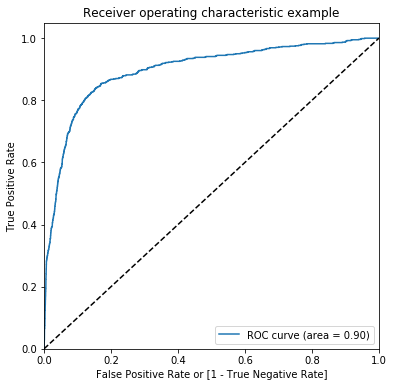

(array([0.00000000e+00, 0.00000000e+00, 1.34372481e-04, ...,
        9.99731255e-01, 9.99865628e-01, 1.00000000e+00]),
 array([0.        , 0.00128535, 0.00128535, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99998888e+00, 9.99988883e-01, 9.99979709e-01, ...,
        6.68188124e-08, 9.59581175e-09, 7.00719284e-12]))

In [83]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.671110,1,1,1,1,1,1,1,0,0,0
1,0,0.005500,1,0,0,0,0,0,0,0,0,0
2,0,0.051405,1,0,0,0,0,0,0,0,0,0
3,0,0.319515,1,1,1,1,0,0,0,0,0,0
4,0,0.520288,1,1,1,1,1,1,0,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.094647  0.000000  1.000000
0.1   0.1  0.361800  0.298038  0.971722
0.2   0.2  0.515085  0.470169  0.944730
0.3   0.3  0.646715  0.617710  0.924165
0.4   0.4  0.752190  0.738646  0.881748
0.5   0.5  0.835036  0.833916  0.845758
0.6   0.6  0.883698  0.895189  0.773779
0.7   0.7  0.910462  0.937920  0.647815
0.8   0.8  0.918735  0.965332  0.473008
0.9   0.9  0.922506  0.984278  0.331620


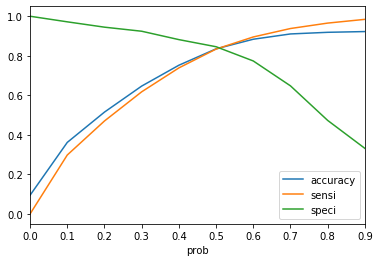

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### Finding cutoff

In [87]:
## Finding the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5112432724141457]


In [88]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.489 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.51 else 0)
y_pred_final.churn.value_counts()

0    7442
1     778
Name: churn, dtype: int64

### confusion matrix 

In [89]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6256, 1186],
       [ 122,  656]], dtype=int64)

## Result of Logistic regression model after removing column using p value and vif 

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8350364963503649
Sensitivity:  0.8431876606683805
Specificity:  0.8406342381080355
false postive rate:  0.15936576189196452
positive predictive value:  0.3561346362649294
Negative predictive value:  0.9808717466290373
Misclassification Rate:  0.1591240875912409


# Model 3: Decision tree classifier with PCA 

In [91]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
# Making predictions
y_pred_default = dt_default.predict(df_test)

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7442
           1       0.33      0.73      0.45       778

    accuracy                           0.83      8220
   macro avg       0.65      0.79      0.68      8220
weighted avg       0.91      0.83      0.86      8220

[[6286 1156]
 [ 212  566]]
Acuracy Score 0.8335766423357664


## Result of Decision Tree Classifier

In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8335766423357664
Sensitivity:  0.8431876606683805
Specificity:  0.8406342381080355
false postive rate:  0.15936576189196452
positive predictive value:  0.3561346362649294
Negative predictive value:  0.9808717466290373
Misclassification Rate:  0.1591240875912409


## Model 3.b:Decision tree classifier with Hyperparameter tuning 

In [94]:
#importing libraries 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(1, 40)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(df_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sco

In [95]:
y_train.shape

(19178,)

In [96]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.098489,0.000801,0.001001,3.873843e-07,1,{'max_depth': 1},0.825645,0.836288,0.796871,0.841721,...,0.826624,0.015767,33,0.829607,0.833464,0.784592,0.847162,0.834387,0.825842,0.021454
1,0.173357,0.001471,0.001403,4.903108e-04,2,{'max_depth': 2},0.735992,0.727320,0.711864,0.732725,...,0.735165,0.018353,39,0.748908,0.728653,0.696344,0.737405,0.763540,0.734970,0.022576
2,0.246624,0.004846,0.001201,4.005196e-04,3,{'max_depth': 3},0.797237,0.846715,0.823468,0.811473,...,0.826311,0.020905,34,0.806857,0.848390,0.817767,0.822329,0.850811,0.829231,0.017392
3,0.312484,0.001941,0.001001,1.168008e-07,4,{'max_depth': 4},0.744071,0.844369,0.778357,0.816688,...,0.788873,0.036757,38,0.747996,0.848129,0.781855,0.825588,0.765105,0.793735,0.037487
4,0.379545,0.000749,0.001201,4.006148e-04,5,{'max_depth': 5},0.832161,0.786236,0.843025,0.829987,...,0.829961,0.024070,32,0.850401,0.806935,0.848270,0.851659,0.871277,0.845708,0.021076


###  a. plotting accuracies with max_depth

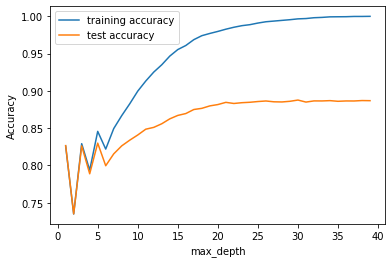

In [97]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### b.Tuning min sample leaf 

In [98]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score = True)
tree.fit(df_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [99]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.798525,0.027076,0.001601,0.00049,5,{'min_samples_leaf': 5},0.854053,0.857664,0.851108,0.853194,...,0.854990,0.002893,1,0.940551,0.943619,0.940103,0.941341,0.949619,0.943047,0.003502
1,0.729662,0.030857,0.001802,0.00040,25,{'min_samples_leaf': 25},0.789679,0.808655,0.782008,0.801565,...,0.793357,0.010155,2,0.848250,0.852236,0.836603,0.851594,0.839992,0.845735,0.006313
2,0.710245,0.030297,0.001201,0.00040,45,{'min_samples_leaf': 45},0.759969,0.780240,0.791395,0.790613,...,0.781416,0.011469,7,0.808552,0.817494,0.826827,0.819983,0.823242,0.819220,0.006187
3,0.661601,0.028982,0.001201,0.00040,65,{'min_samples_leaf': 65},0.787334,0.793535,0.796089,0.777575,...,0.788247,0.006427,3,0.821850,0.822448,0.814834,0.801343,0.813922,0.814879,0.007616
4,0.640782,0.025958,0.001602,0.00049,85,{'min_samples_leaf': 85},0.799844,0.783107,0.783572,0.771838,...,0.784388,0.008938,4,0.822893,0.806414,0.801734,0.792088,0.800430,0.804712,0.010198


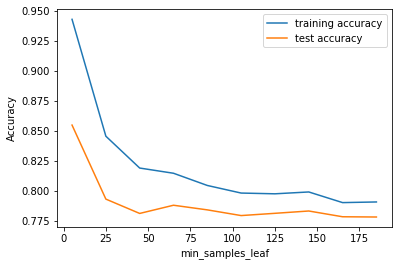

In [100]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### c. Tuning minimum sample split 

In [101]:
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score = True)
tree.fit(df_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [102]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.861582,0.028468,0.001802,0.000401,5,{'min_samples_split': 5},0.882981,0.880605,0.877705,0.882138,...,0.882887,0.004438,1,0.994133,0.994655,0.994395,0.991592,0.995568,0.994069,0.001329
1,0.841364,0.029295,0.001601,0.000490,25,{'min_samples_split': 25},0.845713,0.850104,0.837810,0.847979,...,0.845239,0.004172,2,0.935141,0.940295,0.928893,0.938799,0.929219,0.934469,0.004729
2,0.833759,0.027111,0.001199,0.000401,45,{'min_samples_split': 45},0.816002,0.819082,0.807040,0.823990,...,0.815622,0.005812,3,0.895509,0.890823,0.888614,0.904712,0.877208,0.891373,0.008985
3,0.821746,0.045012,0.001402,0.000490,65,{'min_samples_split': 65},0.797498,0.800834,0.796610,0.801043,...,0.800292,0.003133,4,0.868979,0.856538,0.870951,0.872124,0.863586,0.866435,0.005750
4,0.812338,0.031234,0.001401,0.000490,85,{'min_samples_split': 85},0.791764,0.788321,0.785137,0.788005,...,0.790281,0.004472,5,0.850336,0.839721,0.845271,0.844880,0.854983,0.847038,0.005202


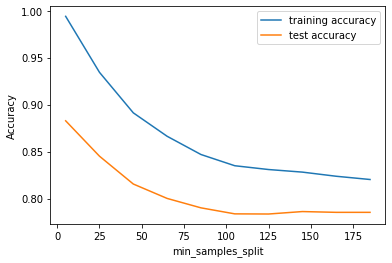

In [103]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_split"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

### d. Creating parameter grid 

In [104]:
# Create the parameter grid 
param_grid = {'max_depth': range(5, 15, 5),'min_samples_leaf': range(5, 200, 20),'min_samples_split': range(5, 200, 20),'criterion': ["entropy", "gini"]}
n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',cv = n_folds, verbose = 1, n_jobs = -1,return_train_score = True)

# Fit the grid search to the data
grid_search.fit(df_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                  

In [105]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.109601,0.062116,0.002803,0.000749,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.823299,...,0.829075,0.015000,20,0.831823,0.841676,0.860132,0.830802,0.827739,0.838435,0.011812
1,1.164654,0.112058,0.005205,0.001601,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.823299,...,0.829179,0.015063,18,0.831823,0.841872,0.859415,0.830802,0.827609,0.838304,0.011585
2,1.135228,0.117277,0.003002,0.002099,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.823299,...,0.828762,0.014619,27,0.831823,0.840503,0.859415,0.830802,0.827609,0.838030,0.011513
3,1.206089,0.140706,0.001802,0.000400,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.823299,...,0.828814,0.014700,26,0.831367,0.840503,0.859415,0.830802,0.827609,0.837939,0.011564
4,1.055557,0.110604,0.002202,0.000400,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.823039,...,0.828866,0.014639,25,0.830650,0.841676,0.857916,0.830802,0.827609,0.837731,0.011168


### # printing the optimal accuracy score and hyperparameters

In [106]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8339242882469496
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [107]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [108]:
y_pred_default = clf_gini.predict(df_test)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6357, 1085],
       [ 246,  532]], dtype=int64)

## Result of Decision Tree classifier with hyperparameter tuning 

In [109]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))
## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.6838046272493573
Specificity:  0.8542058586401505
false postive rate:  0.1457941413598495
positive predictive value:  0.329004329004329
Negative predictive value:  0.9627442071785552
Misclassification Rate:  0.1619221411192214


# Model 4.a: Random Forest Classifier with pca 

In [110]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')
# fit
rfc.fit(df_train,y_train)
# Making predictions
y_pred_default = rfc.predict(df_test)

#creating confusion matrix

In [111]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7361,   81],
       [ 569,  209]], dtype=int64)

## Result of random forest with pca

In [112]:
# TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives
print('Sensitivity: ', TP / float(TP+FN))
print('Specificity: ',TN / float(TN+FP))
print('false postive rate: ',FP/ float(TN+FP))
print('positive predictive value: ', TP / float(TP+FP))
print('Negative predictive value: ',TN / float(TN+ FN))
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.2686375321336761
Specificity:  0.9874184529356943
false postive rate:  0.012581547064305684
positive predictive value:  0.7206896551724138
Negative predictive value:  0.9178457984406584
Misclassification Rate:  0.09007760532150776


## Model 4.b:Hyperparameter tuning for random forest 

In [113]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters,cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score = True)
rf_with_pca.fit(df_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [114]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.404568,0.045302,0.011209,1.191673e-02,2,{'max_depth': 2},0.821736,0.868613,0.842764,0.828422,...,0.832986,0.021855,4,0.833583,0.877200,0.841231,0.830542,0.815356,0.839582,0.020603
1,0.813136,0.070586,0.006005,6.572747e-07,7,{'max_depth': 7},0.878030,0.883212,0.885789,0.882138,...,0.882574,0.002564,3,0.902875,0.904054,0.900671,0.898455,0.903865,0.901984,0.002135
2,1.008716,0.084664,0.007607,1.020908e-03,12,{'max_depth': 12},0.913474,0.918144,0.912647,0.914993,...,0.914537,0.001957,2,0.966821,0.965780,0.961350,0.957831,0.960438,0.962444,0.003370
3,0.958870,0.067152,0.007816,1.182670e-03,17,{'max_depth': 17},0.915559,0.919187,0.919687,0.924641,...,0.920430,0.003180,1,0.984225,0.981880,0.980512,0.982533,0.981685,0.982167,0.001218


### a.  plotting accuracies with max_depth

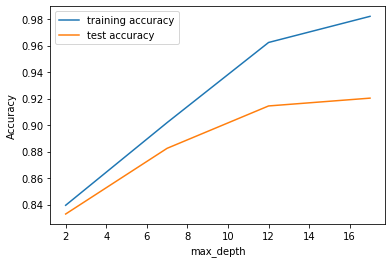

In [115]:
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [116]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score = True)
rf.fit(df_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [117]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.817405,0.391894,0.065060,0.005025,100,{'n_estimators': 100},0.906959,0.909281,0.913168,0.912125,...,0.910262,0.002192,4,0.950720,0.950724,0.951835,0.947403,0.950010,0.950138,0.001487
1,45.062317,0.963027,0.324295,0.026193,500,{'n_estimators': 500},0.907219,0.913452,0.912125,0.914993,...,0.911409,0.002819,2,0.951763,0.953787,0.950987,0.950466,0.951639,0.951729,0.001130
2,74.305873,0.933657,0.462020,0.015292,900,{'n_estimators': 900},0.907740,0.912669,0.913168,0.917601,...,0.911826,0.003676,1,0.951894,0.953266,0.951183,0.950205,0.951313,0.951572,0.001006
3,90.265766,6.335095,0.562511,0.015467,1300,{'n_estimators': 1300},0.906698,0.912669,0.911864,0.916819,...,0.911357,0.003475,3,0.950916,0.953266,0.950857,0.949488,0.952095,0.951324,0.001274


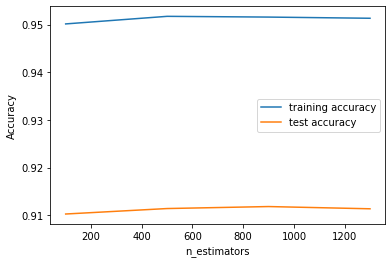

In [118]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_n_estimators"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### b.GridSearchCV to find optimal max_features

In [119]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score = True)
rf.fit(df_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.705238,0.053499,0.011210,0.008408,4,{'max_features': 4},0.898097,0.901721,0.901173,0.903520,...,0.902127,0.002656,5,0.936901,0.943097,0.935606,0.937887,0.944274,0.939553,0.003471
1,1.183073,0.068779,0.009809,0.001941,8,{'max_features': 8},0.904092,0.910323,0.897784,0.905346,...,0.905152,0.004279,4,0.942246,0.946813,0.938278,0.943166,0.949097,0.943920,0.003752
2,1.987604,0.093288,0.007807,0.001328,14,{'max_features': 14},0.903570,0.907456,0.907432,0.910039,...,0.907081,0.002067,3,0.947917,0.947530,0.946425,0.946881,0.951509,0.948052,0.001803
3,2.702653,0.066028,0.006806,0.000400,20,{'max_features': 20},0.898619,0.911105,0.909778,0.910821,...,0.907602,0.004650,2,0.951437,0.951571,0.949358,0.947859,0.949684,0.949982,0.001388
4,2.774319,0.214364,0.005606,0.000491,24,{'max_features': 24},0.908001,0.905109,0.909778,0.915254,...,0.907863,0.004704,1,0.951828,0.953917,0.947729,0.948967,0.949488,0.950386,0.002211


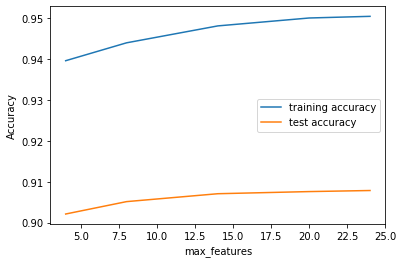

In [121]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_features"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

###  c.GridSearchCV to find optimal min_samples_leaf

In [122]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score = True)
rf.fit(df_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [123]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.816742,0.084701,0.008607,0.001021,100,{'min_samples_leaf': 100},0.847798,0.852450,0.857366,0.854237,...,0.852800,0.003114,1,0.864676,0.862730,0.869452,0.864498,0.864759,0.865223,0.002242
1,0.783708,0.052419,0.009009,0.001675,150,{'min_samples_leaf': 150},0.843367,0.845151,0.844850,0.843286,...,0.843831,0.001006,2,0.850792,0.850997,0.850029,0.853614,0.855504,0.852187,0.002052
2,0.826350,0.114665,0.007207,0.000749,200,{'min_samples_leaf': 200},0.826427,0.845933,0.841721,0.828944,...,0.833351,0.008813,3,0.837494,0.845261,0.843121,0.839797,0.840970,0.841329,0.002678
3,0.693628,0.082961,0.007808,0.001472,250,{'min_samples_leaf': 250},0.826688,0.834984,0.833638,0.838592,...,0.828606,0.010476,5,0.837494,0.835484,0.830476,0.842990,0.821482,0.833585,0.007259
4,0.641782,0.065090,0.007606,0.001856,300,{'min_samples_leaf': 300},0.811572,0.832377,0.847458,0.834420,...,0.828814,0.012654,4,0.823219,0.833659,0.840318,0.840383,0.832692,0.834054,0.006304


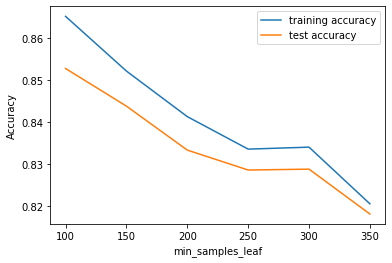

In [124]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

###  d.GridSearchCV to find optimal min_samples_split

In [125]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score = True)
rf.fit(df_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [126]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.576924,0.017098,0.005205,4.001619e-04,200,{'min_samples_split': 200},0.868647,0.874870,0.873272,0.860235,...,0.869225,0.005087,1,0.887100,0.885934,0.888744,0.880141,0.889917,0.886367,0.003398
1,0.553903,0.017355,0.005005,4.422006e-07,250,{'min_samples_split': 250},0.860308,0.870177,0.862321,0.858149,...,0.862551,0.004079,2,0.879278,0.875961,0.877990,0.874340,0.882357,0.877985,0.002763
2,0.541491,0.025582,0.005005,1.907349e-07,300,{'min_samples_split': 300},0.855095,0.865746,0.868840,0.859713,...,0.860204,0.006405,3,0.864416,0.873419,0.878837,0.873819,0.869322,0.871962,0.004832
3,0.531282,0.011489,0.004604,4.904855e-04,350,{'min_samples_split': 350},0.853531,0.857404,0.855020,0.857366,...,0.852435,0.006947,4,0.870282,0.859797,0.860327,0.866454,0.855700,0.862512,0.005186
4,0.503457,0.013081,0.004805,4.010203e-04,400,{'min_samples_split': 400},0.848058,0.852190,0.864407,0.845893,...,0.848211,0.010925,5,0.860635,0.860840,0.866780,0.857785,0.851985,0.859605,0.004805


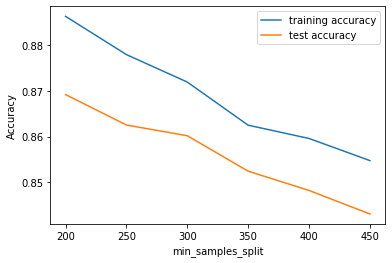

In [127]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_split"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### creating parameter grid

In [128]:
# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [8,10],'min_samples_leaf': range(100, 200, 100),'min_samples_split': range(200, 400, 100),'n_estimators': range(200, 400, 100),'max_features': [8, 10, 12]}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score',cv = 5, n_jobs=-1, verbose = 1,return_train_score = True)

In [129]:
# Fit the grid search to the data
grid_search.fit(df_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [130]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8668787151944937 using {'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


### Building model with best parameters 

In [131]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',max_depth=10,min_samples_leaf=100,min_samples_split=200,max_features=8,n_estimators=300)

In [132]:
# fit
rfc.fit(df_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [133]:
# predict
y_pred_default = rfc.predict(df_test)

In [134]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93      7442
           1       0.41      0.77      0.53       778

    accuracy                           0.87      8220
   macro avg       0.69      0.83      0.73      8220
weighted avg       0.92      0.87      0.89      8220

[[6571  871]
 [ 177  601]]
accuracy_score:   0.8725060827250608


In [135]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[6571,  871],
       [ 177,  601]], dtype=int64)

 ## Result of hyperparameter tuning for random forest

In [136]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives
print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))
print('Sensitivity: ', TP / float(TP+FN))
print('Specificity: ',TN / float(TN+FP))
print('false postive rate: ',FP/ float(TN+FP))
print('positive predictive value: ', TP / float(TP+FP))
print('Negative predictive value: ',TN / float(TN+ FN))
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8725060827250608
Sensitivity:  0.7724935732647815
Specificity:  0.8829615694705725
false postive rate:  0.11703843052942757
positive predictive value:  0.40828804347826086
Negative predictive value:  0.9737700059276823
Misclassification Rate:  0.12749391727493917


# FINAL RESULTS OF ALL MODELS

#### A.Logistic Regression Model With RFE(w/o PCA)

Accuracy Score on test data:  0.8350364963503649<br>
Sensitivity:  0.8431876606683805<br>
Specificity:  0.8406342381080355<br>
false postive rate:  0.15936576189196452<br>
positive predictive value:  0.3561346362649294<br>
Negative predictive value:  0.9808717466290373<br>
Misclassification Rate:  0.1591240875912409<br>

#### B.Logistic Regression Model (with PCA)
Accuracy Score on test data:  0.8480535279805352<br>
Sensitivity:  0.8354755784061697<br>
Specificity:  0.8355280838484278<br>
false postive rate:  0.16447191615157217<br>
positive predictive value:  0.3468516542155816<br>
Negative predictive value:  0.9798298140560984<br>
Misclassification Rate:  0.16447688564476887<br>

#### C.Decison Tree Model (with PCA)
Accuracy Score: 0.8322557096673271<br>
Sensitivity:  0.6928020565552699<br>
Specificity:  0.8531308787960226<br>
false postive rate:  0.14686912120397744<br>
positive predictive value:  0.33026960784313725<br>
Negative predictive value:  0.9637219186399514<br>
Misclassification Rate:  0.16204379562043797<br>

#### D.Random Forest Model (with PCA)
Accuracy Score:   0.8725060827250608<br>
Sensitivity:  0.7724935732647815<br>
Specificity:  0.8829615694705725<br>
false postive rate:  0.11703843052942757<br>
positive predictive value:  0.40828804347826086<br>
Negative predictive value:  0.9737700059276823<br>
Misclassification Rate:  0.12749391727493917<br>


## Visual Representation Of Important Predictor Variables

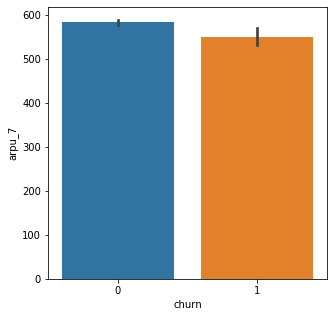

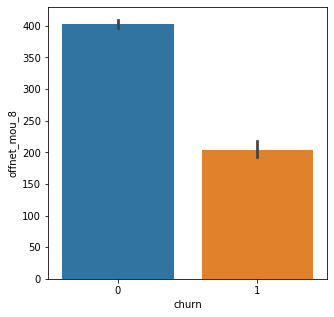

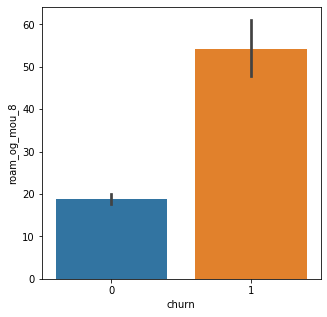

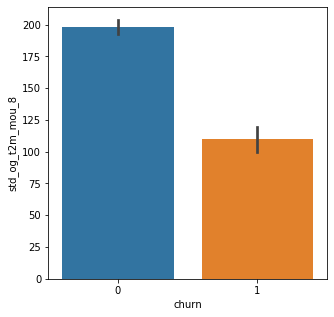

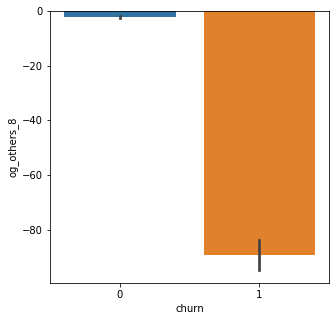

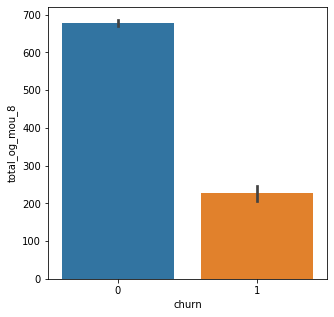

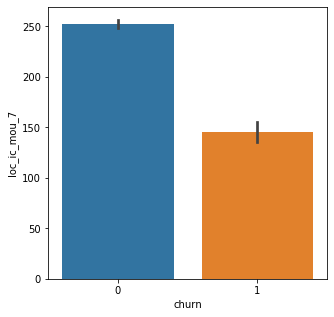

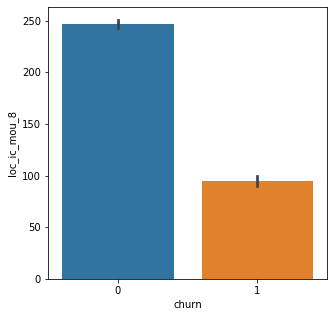

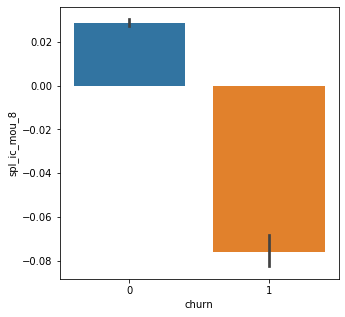

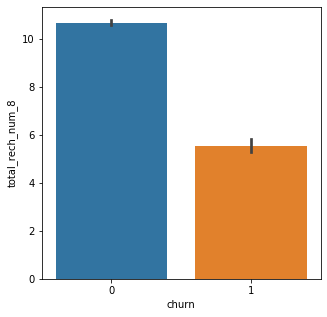

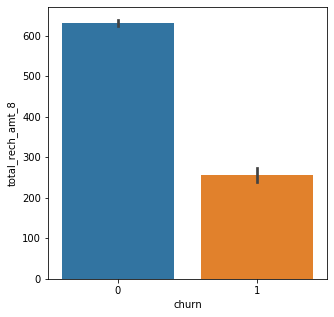

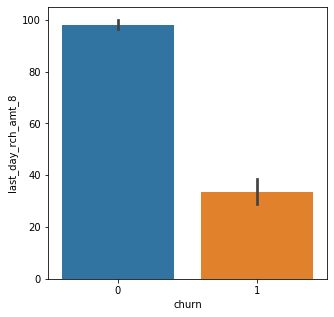

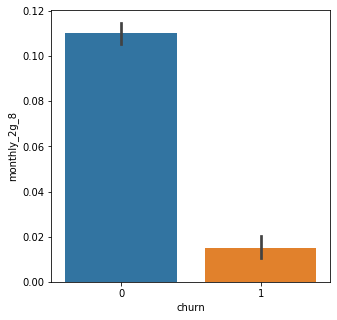

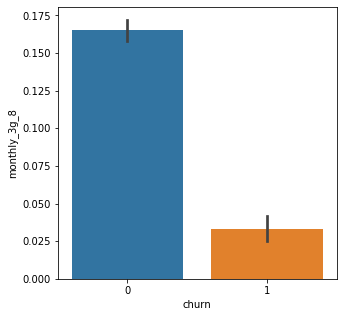

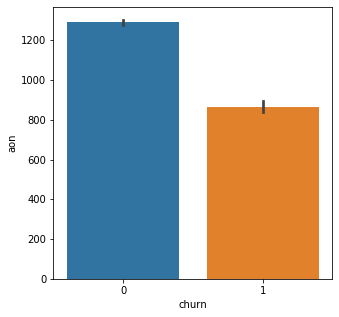

In [138]:
implis=['arpu_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8', 'aon']
for i in implis:
    plt.figure(figsize = (5, 5))
    sns.barplot(x = 'churn', y = i, data = tele_c)
    plt.show()

## Recommend Strategies To Manage Customer Churn 

- arpu_7 : ratio of people not being churned is slightly more than those being churned.Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

- offnet_mou_8 : ratio of people not being churned is much more than those being churned

- roam_og_mou_8 : ratio of people being churned is more.The probability of people having roaming outgoing calls is more for being churn thus focusing on them will help.

- total_og_mou_8 :ratio of people not being churned is much more than those being churned.It is for the total outgoing calls thus offers for outgoing calls would help.

- loc_ic_mou_7 :ratio of people not being churned is much more than those being churned .Thus Lower the local incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.

- loc_ic_mou_8 : ratio of people not being churned is much more than those being churned.Thus Lower the local incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.

- total_rech_amt_8 :  ratio of people not being churned is much more than those being churned.Thus checking the total recharge amount and offering offers could help.

- last_day_rch_amt_8 : ratio of people not being churned is much more than those being churned.Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.

- monthly_2g_8 : according Service schemes with validity equivalent to a month for 2 G networks for month 8 we can see that people being churned is relatively very low compared to those not being churned

- monthly_3g_8 : according Service schemes with validity equivalent to a month for 3 G networks for month 8 we can see that people being churned is relatively very low compared to those not being churned

- aon : according to age on customer we can conclude that there are more people that are not churned thus can be an important factor